<a href="https://colab.research.google.com/github/gitblankhub/Baf/blob/main/%EC%82%B0%EB%B6%88/%EC%B5%9C%EC%A2%85)%EC%82%B0%EB%B6%88data_%EA%B3%B5%ED%86%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,195 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.rc('font', family='NanumBarunGothic')

# 산림청 10년간 산불피해대장

In [ ]:
sanbul=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/산불/sanbul.csv')
sanbul

,년도별 산불통계,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,발생일시_년,발생일시_월,발생일시_일,발생일시_시간,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,발생장소_관서,발생장소_시도,발생장소_시군구,발생장소_읍면,발생장소_동리,발생원인_구분,발생원인_세부원인,발생원인_기타,피해면적_합계
2,2021,12,30,14:57,목,2021,12,30,17:30,경북,경북,봉화,명호,양곡,건,주택화재비화,NaN,0.5
3,2021,12,30,11:16,목,2021,12,30,12:30,충북,충북,청주,오송,상봉,기,기타(직접입력),원인미상,0.4
4,2021,12,29,14:20,수,2021,12,29,17:30,경남,경남,남해,창선,가인,기,기타(직접입력),원인미상,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,2012,01,14,22:15,토,2012,01,15,09:40,전남,전남,완도,금일,동백,기,낚시꾼실화,NaN,2
4807,2012,01,11,15:15,수,2012,01,11,16:50,북부,강원,홍천,홍천,하오안,입,등산객실화,NaN,0.03
4808,2012,01,11,14:30,수,2012,01,11,16:15,경기,경기,남양주,호평,NaN,입,입산자실화,NaN,0.1
4809,2012,01,09,12:15,월,2012,01,09,13:40,경북,경북,영덕,지품,오천,건,보일러과열,NaN,0.1


In [ ]:
sanbul.columns=sanbul.iloc[1,:]
sanbul1 = sanbul.iloc[2:,:]
sanbul1

1,발생일시_년,발생일시_월,발생일시_일,발생일시_시간,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,발생장소_관서,발생장소_시도,발생장소_시군구,발생장소_읍면,발생장소_동리,발생원인_구분,발생원인_세부원인,발생원인_기타,피해면적_합계
2,2021,12,30,14:57,목,2021,12,30,17:30,경북,경북,봉화,명호,양곡,건,주택화재비화,NaN,0.5
3,2021,12,30,11:16,목,2021,12,30,12:30,충북,충북,청주,오송,상봉,기,기타(직접입력),원인미상,0.4
4,2021,12,29,14:20,수,2021,12,29,17:30,경남,경남,남해,창선,가인,기,기타(직접입력),원인미상,0.5
5,2021,12,29,13:53,수,2021,12,29,16:10,전남,전남,순천,NaN,대룡,쓰,쓰레기소각,NaN,0.03
6,2021,12,29,05:47,수,2021,12,29,12:00,전남,전남,완도,완도,장좌,입,기타(직접입력),입산자실화,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,2012,01,14,22:15,토,2012,01,15,09:40,전남,전남,완도,금일,동백,기,낚시꾼실화,NaN,2
4807,2012,01,11,15:15,수,2012,01,11,16:50,북부,강원,홍천,홍천,하오안,입,등산객실화,NaN,0.03
4808,2012,01,11,14:30,수,2012,01,11,16:15,경기,경기,남양주,호평,NaN,입,입산자실화,NaN,0.1
4809,2012,01,09,12:15,월,2012,01,09,13:40,경북,경북,영덕,지품,오천,건,보일러과열,NaN,0.1


In [ ]:
sanbul2 = sanbul1[sanbul1['발생장소_시도']=='강원']
sanbul2

1,발생일시_년,발생일시_월,발생일시_일,발생일시_시간,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,발생장소_관서,발생장소_시도,발생장소_시군구,발생장소_읍면,발생장소_동리,발생원인_구분,발생원인_세부원인,발생원인_기타,피해면적_합계
8,2021,12,29,02:42,수,2021,12,29,15:45,북부,강원,춘천,사북,가일,건,주택화재비화,NaN,4
16,2021,12,19,15:31,일,2021,12,19,16:20,강원,강원,강릉,사천,방동,기,기타(직접입력),재무단투기,0.01
27,2021,11,29,13:45,월,2021,11,29,15:40,강원,강원,횡성,강림,강림,기,기타(직접입력),화목보일러재투기,0.45
45,2021,11,14,21:55,일,2021,11,15,03:00,강원,강원,양양,서,장승,쓰,쓰레기소각,NaN,1.27
54,2021,08,10,14:45,화,2021,08,10,16:24,북부,강원,춘천,사북,고탄,기,낙뢰,NaN,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4789,2012,03,12,15:15,월,2012,03,12,16:40,강원,강원,횡성,갑천,포동,건,주택화재비화,NaN,0.1
4796,2012,02,28,14:40,화,2012,02,28,14:40,강원,강원,양구,동면,팔랑,기,성묘객실화,NaN,0.06
4803,2012,02,16,14:05,목,2012,02,16,15:15,강원,강원,원주,소초,둔둔,건,주택화재비화,NaN,0.1
4804,2012,02,05,16:28,일,2012,02,05,16:49,강원,강원,고성,거진,거진,입,입산자실화,NaN,0.2


### 결측치

In [ ]:
sanbul2.isna().sum()

1
발생일시_년         0
발생일시_월         0
발생일시_일         0
발생일시_시간        0
발생일시_요일        0
진화종료시간_년       0
진화종료시간_월       0
진화종료시간_일       0
진화종료시간_시간      0
발생장소_관서        0
발생장소_시도        0
발생장소_시군구       0
발생장소_읍면        6
발생장소_동리       30
발생원인_구분        0
발생원인_세부원인      0
발생원인_기타      478
피해면적_합계        0
dtype: int64

In [ ]:
sanbul2[sanbul2['발생장소_읍면'].isna()].iloc[:,9:14]

1,발생장소_관서,발생장소_시도,발생장소_시군구,발생장소_읍면,발생장소_동리
71,강원,강원,태백,NaN,하사미
318,강원,강원,동해,NaN,부곡
436,강원,강원,동해,NaN,신흥
855,강원,강원,강릉,NaN,대전
930,강원,강원,강릉,NaN,홍제
972,강원,강원,강릉,NaN,죽헌


In [ ]:
sanbul2[sanbul2['발생장소_동리'].isna()].iloc[:,9:14]

1,발생장소_관서,발생장소_시도,발생장소_시군구,발생장소_읍면,발생장소_동리
1155,강원,강원,춘천,석사,NaN
1158,강원,강원,춘천,석사,NaN
1364,강원,강원,속초,도문,NaN
1434,강원,강원,원주,단계,NaN
1521,강원,강원,동해,신흥,NaN
1572,동부,강원,태백,백산,NaN
1922,강원,강원,원주,태장,NaN
1938,강원,강원,춘천,온의,NaN
2430,북부,강원,춘천,칠전,NaN
2476,강원,강원,속초,설악,NaN


In [ ]:
for i in ['하사미','부곡','신흥','대전','홍제','죽헌']:
  print(sanbul2[ sanbul2['발생장소_읍면'] ==  i ].iloc[:,9:14])

# 하사미 신흥 - 읍면 에서도 나타남..?
# 하사미 = 동
# 신흥 = 마을/동

1    발생장소_관서 발생장소_시도 발생장소_시군구 발생장소_읍면 발생장소_동리
4331      강원      강원       태백     하사미     NaN
Empty DataFrame
Columns: [발생장소_관서, 발생장소_시도, 발생장소_시군구, 발생장소_읍면, 발생장소_동리]
Index: []
1    발생장소_관서 발생장소_시도 발생장소_시군구 발생장소_읍면 발생장소_동리
1521      강원      강원       동해      신흥     NaN
Empty DataFrame
Columns: [발생장소_관서, 발생장소_시도, 발생장소_시군구, 발생장소_읍면, 발생장소_동리]
Index: []
Empty DataFrame
Columns: [발생장소_관서, 발생장소_시도, 발생장소_시군구, 발생장소_읍면, 발생장소_동리]
Index: []
Empty DataFrame
Columns: [발생장소_관서, 발생장소_시도, 발생장소_시군구, 발생장소_읍면, 발생장소_동리]
Index: []


In [ ]:
### 읍면이 아니라 동리로 수정
sanbul2.loc[4331]['발생장소_읍면']=np.nan
sanbul2.loc[4331]['발생장소_동리']='하사미'
print(sanbul2.loc[4331])

sanbul2.loc[1521]['발생장소_읍면']=np.nan
sanbul2.loc[1521]['발생장소_동리']='신흥'
print(sanbul2.loc[1521])

1
발생일시_년             2013
발생일시_월               11
발생일시_일               22
발생일시_시간           22:17
발생일시_요일               금
진화종료시간_년           2013
진화종료시간_월             11
진화종료시간_일             23
진화종료시간_시간         02:30
발생장소_관서              강원
발생장소_시도              강원
발생장소_시군구             태백
발생장소_읍면             NaN
발생장소_동리             하사미
발생원인_구분               기
발생원인_세부원인      기타(직접입력)
발생원인_기타      산업현장실화(추정)
피해면적_합계            0.05
Name: 4331, dtype: object
1
발생일시_년         2019
발생일시_월           01
발생일시_일           30
발생일시_시간       16:23
발생일시_요일           수
진화종료시간_년       2019
진화종료시간_월         01
진화종료시간_일         30
진화종료시간_시간     20:00
발생장소_관서          강원
발생장소_시도          강원
발생장소_시군구         동해
발생장소_읍면         NaN
발생장소_동리          신흥
발생원인_구분           기
발생원인_세부원인    굴삭기 화재
발생원인_기타         NaN
피해면적_합계        0.34
Name: 1521, dtype: object


### datetime 형태로 (+진화소요시간 - 이상치

In [ ]:
import datetime as dt

sanbul2['발생'] = sanbul2['발생일시_년']+sanbul2['발생일시_월']+sanbul2['발생일시_일']+' '+sanbul2['발생일시_시간']
sanbul2['진화'] = sanbul2['진화종료시간_년']+sanbul2['진화종료시간_월']+sanbul2['진화종료시간_일']+' '+sanbul2['진화종료시간_시간']

sanbul2['발생'] = pd.to_datetime(sanbul2['발생'])
sanbul2['진화'] = pd.to_datetime(sanbul2['진화'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
sanbul2[sanbul2['진화']<=sanbul2['발생']] # 이상치

sanbul2=sanbul2[sanbul2['진화']>sanbul2['발생']] # 진화가 더 나중인 경우만

In [ ]:
# 진화하는데 걸린 시간
sanbul2['진화시간']=sanbul2['진화']-sanbul2['발생']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sanbul2['진화시간'].describe()

count                          718
mean     0 days 03:30:05.348189415
std      0 days 06:35:33.863344700
min                0 days 00:16:00
25%                0 days 01:14:00
50%                0 days 01:55:00
75%                0 days 03:05:30
max                2 days 23:38:00
Name: 진화시간, dtype: object

### 데이터 타입 변환

In [ ]:
sanbul2.dtypes

1
발생일시_년                object
발생일시_월                object
발생일시_일                object
발생일시_시간               object
발생일시_요일               object
진화종료시간_년              object
진화종료시간_월              object
진화종료시간_일              object
진화종료시간_시간             object
발생장소_관서               object
발생장소_시도               object
발생장소_시군구              object
발생장소_읍면               object
발생장소_동리               object
발생원인_구분               object
발생원인_세부원인             object
발생원인_기타               object
피해면적_합계               object
발생            datetime64[ns]
진화            datetime64[ns]
진화시간         timedelta64[ns]
dtype: object

In [ ]:
sanbul2=sanbul2.astype({'발생일시_년':'int',
                        '발생일시_월':'int',
                        '발생일시_일':'int',
                        '진화종료시간_년':'int',
                        '진화종료시간_월':'int',
                        '진화종료시간_일':'int',
                        '피해면적_합계':'float'})
sanbul2.dtypes

1
발생일시_년                 int64
발생일시_월                 int64
발생일시_일                 int64
발생일시_시간               object
발생일시_요일               object
진화종료시간_년               int64
진화종료시간_월               int64
진화종료시간_일               int64
진화종료시간_시간             object
발생장소_관서               object
발생장소_시도               object
발생장소_시군구              object
발생장소_읍면               object
발생장소_동리               object
발생원인_구분               object
발생원인_세부원인             object
발생원인_기타               object
피해면적_합계              float64
발생            datetime64[ns]
진화            datetime64[ns]
진화시간         timedelta64[ns]
dtype: object

### 그래프

#### 발생장소

발생장소_시군구
강릉     55
고성     24
동해      7
삼척     45
속초      4
양구     27
양양     30
영월     38
원주     60
인제     37
정선     30
철원     30
춘천    101
태백      5
평창     34
홍천    102
화천     34
횡성     55
dtype: int64


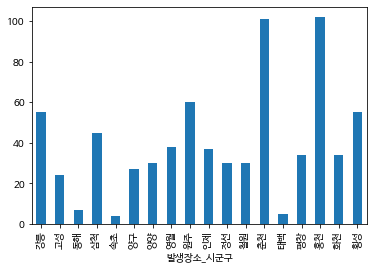

In [ ]:
print(sanbul2.groupby('발생장소_시군구').size())

sanbul2.groupby('발생장소_시군구').size().plot(kind='bar')
plt.show()

#### 진화시간

In [ ]:
# 진화하는데 소요한 시간 분 단위
sanbul2['진화시간_분']=sanbul2['진화시간']/np.timedelta64(1,'m')

# 진화하는데 소요한 시간 시간 단위
sanbul2['진화시간_시간']=sanbul2['진화시간']/np.timedelta64(1,'h')

In [ ]:
#sanbul2.to_csv('/content/drive/MyDrive/Colab Notebooks/산불/산불_데이터.csv',encoding='utf-8-sig')

#### 발생원인

In [ ]:
sanbul2.groupby(['발생원인_구분','발생원인_세부원인']).size()

발생원인_구분  발생원인_세부원인    
건        건축물 실화(공장)        1
         건축물화재비화           1
         공장화재              1
         기타(직접입력)          6
         농막화재              1
                          ..
입        입산자(수렵인)실화 추정     1
         입산자실화            30
         입산자실화 추정         39
         입산자실화추정           4
         취사행위              1
Length: 97, dtype: int64

In [ ]:
# 발생세부원인 띄어쓰기 제거
sanbul2['발생원인_세부원인']=sanbul2['발생원인_세부원인'].str.replace(' ','')
sanbul2['발생원인_기타']=sanbul2['발생원인_기타'].str.replace(' ','')

In [ ]:
sanbul2.groupby(['발생원인_구분','발생원인_세부원인']).size()

발생원인_구분  발생원인_세부원인    
건        건축물실화(공장)         1
         건축물화재비화           1
         공장화재              1
         기타(직접입력)          6
         농막화재              1
                          ..
입        입산자(수렵인)실화추정      1
         입산자실화            46
         입산자실화(노숙자모닥불)     1
         입산자실화추정          71
         취사행위              1
Length: 85, dtype: int64

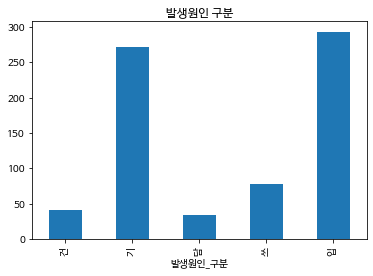

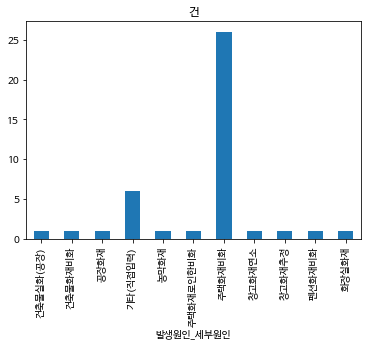

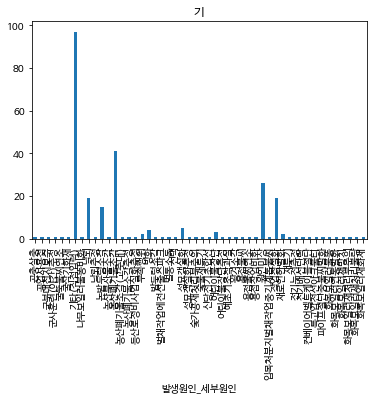

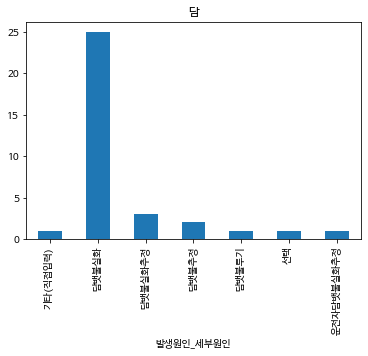

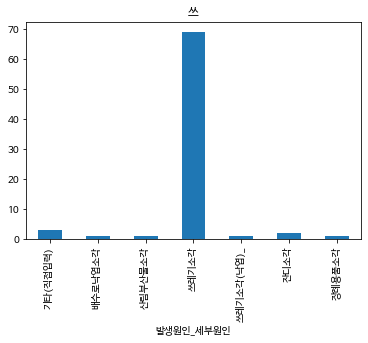

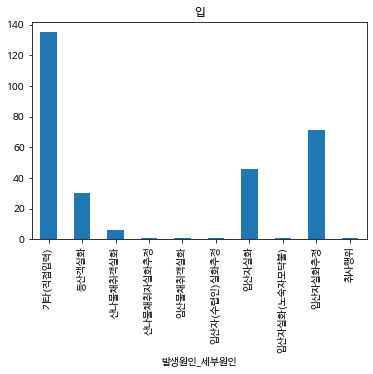

In [ ]:
sanbul2.groupby('발생원인_구분').size().plot(kind='bar')
plt.title('발생원인 구분')
plt.show()


# 발생 세부 원인
for i in ['건','기','담','쓰','입']:
  sanbul2[sanbul2['발생원인_구분']==i].groupby('발생원인_세부원인').size().plot(kind='bar')
  plt.title(i)
  plt.show()

#### 피해면적

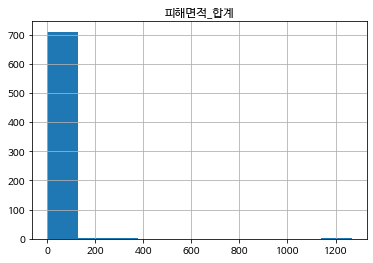

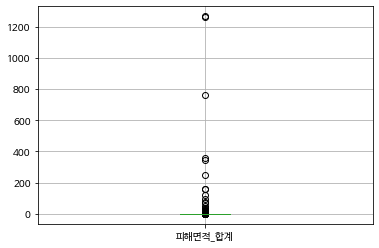

In [ ]:
#sanbul2['피해면적_합계'].hist(bins=0.1)
sanbul2.hist(column='피해면적_합계',bins=10)
plt.show()
sanbul2.boxplot(column='피해면적_합계')
plt.show()

#### 피해면적 - 진화시간 이상치

In [ ]:
sanbul2.columns

Index(['발생일시_년', '발생일시_월', '발생일시_일', '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시도', '발생장소_시군구',
       '발생장소_읍면', '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타', '피해면적_합계',
       '발생', '진화', '진화시간', '진화시간_분', '진화시간_시간'],
      dtype='object', name=1)

In [ ]:
sanbul2[ (sanbul2['피해면적_합계']>=100) | (sanbul2['진화시간_분']>=1440) ][['발생', '진화', '진화시간', '진화시간_분', '발생장소_시군구','피해면적_합계']]

1,발생,진화,진화시간,진화시간_분,발생장소_시군구,피해면적_합계
265,2021-02-20 15:50:00,2021-02-22 03:00:00,1 days 11:10:00,2110.0,정선,24.56
539,2020-05-01 20:10:00,2020-05-02 09:00:00,0 days 12:50:00,770.0,고성,123.20
968,2020-01-04 13:54:00,2020-01-05 17:10:00,1 days 03:16:00,1636.0,춘천,34.26
1263,2019-04-04 23:46:00,2019-04-05 21:30:00,0 days 21:44:00,1304.0,강릉,1260.15
1266,2019-04-04 19:17:00,2019-04-05 18:00:00,0 days 22:43:00,1363.0,고성,1266.62
1271,2019-04-04 14:45:00,2019-04-06 18:00:00,2 days 03:15:00,3075.0,인제,344.93
1621,2019-01-01 16:12:00,2019-01-02 17:20:00,1 days 01:08:00,1508.0,양양,97.94
1758,2018-06-22 18:02:00,2018-06-23 23:30:00,1 days 05:28:00,1768.0,인제,0.54
1905,2018-03-28 06:19:00,2018-03-28 22:00:00,0 days 15:41:00,941.0,고성,356.85
2049,2018-02-11 21:27:00,2018-02-13 21:00:00,1 days 23:33:00,2853.0,삼척,76.46


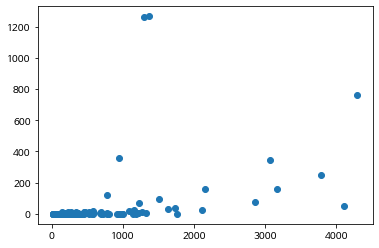

In [ ]:
plt.scatter(sanbul2['진화시간_분'],sanbul2['피해면적_합계'])
# 피해면적에 비해 진화시간이 긴 관측치 살펴보기
plt.show()

In [ ]:
sanbul2[ (sanbul2['피해면적_합계']<=600) & (sanbul2['진화시간_분']>=1000) ][['발생', '진화', '진화시간', '진화시간_분', '발생장소_시군구','피해면적_합계']]
#2021 3 31 양구 산불 (실제로 16시간만에 진화됐다는 기사)
# 2021 1 15 인제 산불 (https://news.imaeil.com/page/view/2021011517544892175 : 기상 악화로 헬기 투입 못하는...)

1,발생,진화,진화시간,진화시간_분,발생장소_시군구,피해면적_합계
181,2021-03-31 15:56:00,2021-04-01 11:00:00,0 days 19:04:00,1144.0,양구,0.50
182,2021-03-31 15:38:00,2021-04-01 12:54:00,0 days 21:16:00,1276.0,정선,10.70
199,2021-03-23 15:52:00,2021-03-24 11:00:00,0 days 19:08:00,1148.0,홍천,20.00
265,2021-02-20 15:50:00,2021-02-22 03:00:00,1 days 11:10:00,2110.0,정선,24.56
325,2021-01-15 15:39:00,2021-01-16 11:30:00,0 days 19:51:00,1191.0,인제,0.21
615,2020-04-14 17:48:00,2020-04-15 12:00:00,0 days 18:12:00,1092.0,철원,19.00
968,2020-01-04 13:54:00,2020-01-05 17:10:00,1 days 03:16:00,1636.0,춘천,34.26
1271,2019-04-04 14:45:00,2019-04-06 18:00:00,2 days 03:15:00,3075.0,인제,344.93
1546,2019-01-27 14:22:00,2019-01-28 10:30:00,0 days 20:08:00,1208.0,춘천,3.60
1621,2019-01-01 16:12:00,2019-01-02 17:20:00,1 days 01:08:00,1508.0,양양,97.94


In [ ]:
# 이상치가 아니라 투입이 어려워 진화에 오래 걸린 것으로 추정.

### 변수 선택 (sanbul3)

In [ ]:
sanbul3=sanbul2[['발생','발생일시_년','발생일시_월', '진화', '진화시간', '진화시간_분','발생장소_시군구',
       '발생장소_읍면', '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타', '피해면적_합계']]
sanbul3

1,발생,발생일시_년,발생일시_월,진화,진화시간,진화시간_분,발생장소_시군구,발생장소_읍면,발생장소_동리,발생원인_구분,발생원인_세부원인,발생원인_기타,피해면적_합계
8,2021-12-29 02:42:00,2021,12,2021-12-29 15:45:00,0 days 13:03:00,783.0,춘천,사북,가일,건,주택화재비화,NaN,4.00
16,2021-12-19 15:31:00,2021,12,2021-12-19 16:20:00,0 days 00:49:00,49.0,강릉,사천,방동,기,기타(직접입력),재무단투기,0.01
27,2021-11-29 13:45:00,2021,11,2021-11-29 15:40:00,0 days 01:55:00,115.0,횡성,강림,강림,기,기타(직접입력),화목보일러재투기,0.45
45,2021-11-14 21:55:00,2021,11,2021-11-15 03:00:00,0 days 05:05:00,305.0,양양,서,장승,쓰,쓰레기소각,NaN,1.27
54,2021-08-10 14:45:00,2021,8,2021-08-10 16:24:00,0 days 01:39:00,99.0,춘천,사북,고탄,기,낙뢰,NaN,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,2012-03-30 17:26:00,2012,3,2012-03-30 19:00:00,0 days 01:34:00,94.0,양구,양구,용진,건,주택화재비화,NaN,0.10
4789,2012-03-12 15:15:00,2012,3,2012-03-12 16:40:00,0 days 01:25:00,85.0,횡성,갑천,포동,건,주택화재비화,NaN,0.10
4803,2012-02-16 14:05:00,2012,2,2012-02-16 15:15:00,0 days 01:10:00,70.0,원주,소초,둔둔,건,주택화재비화,NaN,0.10
4804,2012-02-05 16:28:00,2012,2,2012-02-05 16:49:00,0 days 00:21:00,21.0,고성,거진,거진,입,입산자실화,NaN,0.20


In [ ]:
# date hour place 만들기
sanbul3['date']=sanbul3['발생'].dt.date
sanbul3['hour']=sanbul3['발생'].dt.hour
sanbul3['place']=sanbul3['발생장소_시군구']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

### ! 중복 데이터 제거

In [ ]:
sanbul3[sanbul3.duplicated(['발생'], keep='first')] #발생일시가 똑같은
sanbul3[sanbul3['발생']=='2021-06-07 15:13:00'] # 66 column 제거

1,발생,발생일시_년,발생일시_월,진화,진화시간,진화시간_분,발생장소_시군구,발생장소_읍면,발생장소_동리,발생원인_구분,발생원인_세부원인,발생원인_기타,피해면적_합계,date,hour,place
65,2021-06-07 15:13:00,2021,6,2021-06-07 17:00:00,0 days 01:47:00,107.0,강릉,주문진,향호,쓰,쓰레기소각,NaN,0.01,2021-06-07,15,강릉
66,2021-06-07 15:13:00,2021,6,2021-06-07 16:00:00,0 days 00:47:00,47.0,강릉,주문진,향호,기,기타(직접입력),원인미상,0.01,2021-06-07,15,강릉


In [ ]:
sanbul3=sanbul3.drop(66)
sanbul3.shape

(717, 16)

# 기상청

## 기상청 2012~2021 : 방재기상

강원도  - 지상청 종관관측     
90	속초	강원지방기상청 **(속초시   
93	북춘천	춘천기상대  
95	철원	강원지방기상청 *(철원군    
100	대관령	강원지방기상청   
101	춘천	춘천기상대 **(춘천시
104	북강릉	강원지방기상청   
105	강릉	강원지방기상청 **(강릉시   
106	동해	강원지방기상청 **(동해시
114	원주	강원지방기상청 **(원주시   
121	영월	강원지방기상청 *(영월군   
211 인제  강원지방기상청 *(인제군   
212	홍천	춘천기상대 *(홍천군   
216	태백	강원지방기상청 **(태백시     
217	정선군	강원지방기상청 *(정선군   


 고성-*(고성군  ~ 간성     
 삼척-**삼척시 --    
 양구-*(양구군  --   
 양양-*(양양군  --     
 평창*(평창군 --   
 화천*(화천군 --   
 횡성*(횡성군 --


고성(간성) 517  
삼척 876  
양구 556  
양양 670  
평창 526  
화천 555  
횡성 536  

In [ ]:

path='/content/drive/MyDrive/Colab Notebooks/산불/SURFACE_AWS_{}_HR_2012.csv'
aws2012 = pd.concat([pd.read_csv(path.format(i),encoding='cp949') for i in [517,526,536,555,556,670,876]])

path='/content/drive/MyDrive/Colab Notebooks/산불/SURFACE_AWS_{}_HR_2013.csv'
aws2013 = pd.concat([pd.read_csv(path.format(i),encoding='cp949') for i in [517,526,536,555,556,670,876]])

path='/content/drive/MyDrive/Colab Notebooks/산불/SURFACE_AWS_{}_HR_2014.csv'
aws2014 = pd.concat([pd.read_csv(path.format(i),encoding='cp949') for i in [517,526,536,555,556,670,876]])

path='/content/drive/MyDrive/Colab Notebooks/산불/SURFACE_AWS_{}_HR_2015.csv'
aws2015 = pd.concat([pd.read_csv(path.format(i),encoding='cp949') for i in [517,526,536,555,556,670,876]])

path='/content/drive/MyDrive/Colab Notebooks/산불/SURFACE_AWS_{}_HR_2016.csv'
aws2016 = pd.concat([pd.read_csv(path.format(i),encoding='cp949') for i in [517,526,536,555,556,670,876]])

path='/content/drive/MyDrive/Colab Notebooks/산불/SURFACE_AWS_{}_HR_2017.csv'
aws2017 = pd.concat([pd.read_csv(path.format(i),encoding='cp949') for i in [517,526,536,555,556,670,876]])

path='/content/drive/MyDrive/Colab Notebooks/산불/SURFACE_AWS_{}_HR_2018.csv'
aws2018 = pd.concat([pd.read_csv(path.format(i),encoding='cp949') for i in [517,526,536,555,556,670,876]])

path='/content/drive/MyDrive/Colab Notebooks/산불/SURFACE_AWS_{}_HR_2019.csv'
aws2019 = pd.concat([pd.read_csv(path.format(i),encoding='cp949') for i in [517,526,536,555,556,670,876]])

path='/content/drive/MyDrive/Colab Notebooks/산불/SURFACE_AWS_{}_HR_2020.csv'
aws2020 = pd.concat([pd.read_csv(path.format(i),encoding='cp949') for i in [517,526,536,555,556,670,876]])

path='/content/drive/MyDrive/Colab Notebooks/산불/SURFACE_AWS_{}_HR_2021.csv'
aws2021 = pd.concat([pd.read_csv(path.format(i),encoding='cp949') for i in [517,526,536,555,556,670,876]])



## 기상청 2012~2021 : 종관기상

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/산불/asos{}.csv'

for i in range(2012,2022,1):
  globals()["asos{}".format(i)]=pd.read_csv(path.format(i),encoding='cp949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(asos2012.head(3))
print(aws2012.head(3))

   지점 지점명                일시  기온(°C)  강수량(mm)  풍속(m/s)  풍향(16방위)  습도(%)  \
0  90  속초  2012-01-01 00:00    -0.5      NaN      0.9      50.0   57.0   
1  90  속초  2012-01-01 01:00     0.3      NaN      1.2     290.0   54.0   
2  90  속초  2012-01-01 02:00     0.3      NaN      1.4     320.0   53.0   

   증기압(hPa)  이슬점온도(°C)  ...  해면기압(hPa)  일조(hr)  일사(MJ/m2)  적설(cm)  전운량(10분위)  \
0       3.4       -7.9  ...     1022.6     NaN        NaN     1.6        3.0   
1       3.4       -7.9  ...     1022.4     NaN        NaN     NaN        NaN   
2       3.3       -8.1  ...     1022.3     NaN        NaN     NaN        NaN   

   중하층운량(10분위)  운형(운형약어) 최저운고(100m )  지면상태(지면상태코드)  지면온도(°C)  
0          1.0      ScCi        10.0           NaN      -2.3  
1          NaN       NaN         NaN           NaN      -2.5  
2          NaN       NaN         NaN           NaN      -2.6  

[3 rows x 21 columns]
    지점                일시  기온(°C)  풍향(deg)  풍속(m/s)  강수량(mm)  현지기압(hPa)  \
0  517  2012-01-01 00:00    -0.7 

### * 정선군 (sanbul4)

In [ ]:
print(set(sanbul3['발생장소_시군구']))
print(set(asos2012['지점명']))
print(set(sanbul3['발생장소_시군구']) - set(asos2012['지점명']))
# 산림청 데이터 '정선군' 으로 바꾸기
sanbul4=sanbul3.replace('정선','정선군')
print()
print(set(sanbul4['발생장소_시군구']) - set(asos2012['지점명']))

{'정선', '삼척', '인제', '고성', '화천', '횡성', '철원', '동해', '속초', '영월', '홍천', '강릉', '원주', '평창', '양구', '양양', '태백', '춘천'}
{'정선군', '북강릉', '인제', '동해', '속초', '철원', '영월', '대관령', '강릉', '원주', '홍천', '태백', '춘천'}
{'삼척', '정선', '고성', '횡성', '평창', '양양', '화천', '양구'}

{'삼척', '고성', '횡성', '평창', '양양', '화천', '양구'}


## 데이터 합치기 : 종관기상 방재기상

In [ ]:
# aws 지점명 추가
"""
고성(간성) 517
삼척 876
양구 556
양양 670
평창 526
화천 555
횡성 536
"""
def set_values(row,value):
  return(value[row])

map={517:'고성',526:'평창',536:'횡성',555:'화천',556:'양구',670:'양양',876:'삼척'}
for df in [aws2012,aws2013,aws2014,aws2015,aws2016,aws2017,aws2018,aws2019,aws2020,aws2021]:
  df['지점명'] = df['지점'].apply(set_values,args=(map, ))

In [ ]:
print(asos2012.columns)
print()
print(aws2012.columns)

Index(['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)',
       '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)',
       '최저운고(100m )', '지면상태(지면상태코드)', '지면온도(°C)'],
      dtype='object')

Index(['지점', '일시', '기온(°C)', '풍향(deg)', '풍속(m/s)', '강수량(mm)', '현지기압(hPa)',
       '해면기압(hPa)', '습도(%)', '일사(MJ/m^2)', '일조(hr)', '지점명'],
      dtype='object')


In [ ]:
# aws / asos column name 변경
'''
'풍향' 으로 변경
'일사(MJ/m2)'로 변경

'''
for i in range(2012,2022,1):
  globals()["asos{}".format(i)].rename(columns={'풍향(16방위)':'풍향'},inplace=True)
  globals()["aws{}".format(i)].rename(columns={'풍향(deg)':'풍향'},inplace=True)
  globals()["aws{}".format(i)].rename(columns={'일사(MJ/m^2)':'일사(MJ/m2)'},inplace=True)


### merge

In [ ]:
for i in range(2012,2022,1):
  globals()["asos{}".format(i)].rename(columns={'풍향(16방위)':'풍향'},inplace=True)
  globals()["aws{}".format(i)].rename(columns={'풍향(deg)':'풍향'},inplace=True)
  globals()["aws{}".format(i)].rename(columns={'일사(MJ/m^2)':'일사(MJ/m2)'},inplace=True)


In [ ]:
wdata2012 = pd.merge(asos2012,aws2012,how='outer')
wdata2013 = pd.merge(asos2013,aws2013,how='outer')
wdata2014 = pd.merge(asos2014,aws2014,how='outer')
wdata2015 = pd.merge(asos2015,aws2015,how='outer')
wdata2016 = pd.merge(asos2016,aws2016,how='outer')
wdata2017 = pd.merge(asos2017,aws2017,how='outer')
wdata2018 = pd.merge(asos2018,aws2018,how='outer')
wdata2019 = pd.merge(asos2019,aws2019,how='outer')
wdata2020 = pd.merge(asos2020,aws2020,how='outer')
wdata2021 = pd.merge(asos2021,aws2021,how='outer')

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1218: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [ ]:
# datetime type
wdata2012['일시']=pd.to_datetime(wdata2012['일시'])
wdata2013['일시']=pd.to_datetime(wdata2013['일시'])
wdata2014['일시']=pd.to_datetime(wdata2014['일시'])
wdata2015['일시']=pd.to_datetime(wdata2015['일시'])
wdata2016['일시']=pd.to_datetime(wdata2016['일시'])
wdata2017['일시']=pd.to_datetime(wdata2017['일시'])
wdata2018['일시']=pd.to_datetime(wdata2018['일시'])
wdata2019['일시']=pd.to_datetime(wdata2019['일시'])
wdata2020['일시']=pd.to_datetime(wdata2020['일시'])
wdata2021['일시']=pd.to_datetime(wdata2021['일시'])

## 기상청 2012~2021 : 종관&방재

### EDA

In [ ]:
print(wdata2012.shape)
print()
print(wdata2012.isna().sum())
print()
print(wdata2012.describe())

(175653, 21)

지점                   0
지점명                  0
일시                   0
기온(°C)              12
강수량(mm)         104399
풍속(m/s)            136
풍향                 311
습도(%)              953
증기압(hPa)         61463
이슬점온도(°C)        61463
현지기압(hPa)        60040
해면기압(hPa)        60040
일조(hr)           52109
일사(MJ/m2)        90172
적설(cm)          170352
전운량(10분위)       134220
중하층운량(10분위)     134220
운형(운형약어)        144301
최저운고(100m )     149209
지면상태(지면상태코드)    166866
지면온도(°C)         61463
dtype: int64

                  지점         기온(°C)       강수량(mm)        풍속(m/s)  \
count  175653.000000  175641.000000  71254.000000  175517.000000   
mean      301.334199      10.571205      0.347442       1.879879   
std       237.549271      11.413974      1.552879       1.521929   
min        90.000000     -24.600000      0.000000       0.000000   
25%       104.000000       1.400000      0.000000       0.800000   
50%       211.000000      11.700000      0.000000       1.500000   
75%       526

In [ ]:
# column 선택 - wwdata2012~wwdata2021 생성

for i in range(2012,2022,1):
  globals()["wwdata{}".format(i)] = globals()["wdata{}".format(i)][['지점', '지점명', '일시',
        '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향', '습도(%)',
        '이슬점온도(°C)', '현지기압(hPa)','해면기압(hPa)', '일조(hr)', '일사(MJ/m2)','지면온도(°C)']]

wwdata2012.isna().sum()

지점                0
지점명               0
일시                0
기온(°C)           12
강수량(mm)      104399
풍속(m/s)         136
풍향              311
습도(%)           953
이슬점온도(°C)     61463
현지기압(hPa)     60040
해면기압(hPa)     60040
일조(hr)        52109
일사(MJ/m2)     90172
지면온도(°C)      61463
dtype: int64

#### column 명 변경 (for merge)

In [ ]:
for i in range(2012,2022,1):
  globals()["wwdata{}".format(i)]['date'] = globals()["wdata{}".format(i)]['일시'].dt.date
  globals()["wwdata{}".format(i)]['hour'] = globals()["wdata{}".format(i)]['일시'].dt.hour
  globals()["wwdata{}".format(i)]['place'] = globals()["wdata{}".format(i)]['지점명']

  globals()["wwdata{}".format(i)]['year'] = globals()["wdata{}".format(i)]['일시'].dt.year
  globals()["wwdata{}".format(i)]['month'] = globals()["wdata{}".format(i)]['일시'].dt.month
  globals()["wwdata{}".format(i)]['day'] = globals()["wdata{}".format(i)]['일시'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

#### NA

In [ ]:
# 강수량 NA
print(wwdata2012[wwdata2012['강수량(mm)'].isna()])
print("NA인 경우 : ",wwdata2012[wwdata2012['강수량(mm)'].isna()].shape)
print("강수량 0 인 경우 : ",wwdata2012[wwdata2012['강수량(mm)']==0].shape)
print("강수량 0 이상인 경우 : ",wwdata2012[wwdata2012['강수량(mm)']>0].shape)

         지점 지점명                  일시  기온(°C)  강수량(mm)  풍속(m/s)     풍향  습도(%)  \
0        90  속초 2012-01-01 00:00:00    -0.5      NaN      0.9   50.0   57.0   
1        90  속초 2012-01-01 01:00:00     0.3      NaN      1.2  290.0   54.0   
2        90  속초 2012-01-01 02:00:00     0.3      NaN      1.4  320.0   53.0   
3        90  속초 2012-01-01 03:00:00     0.5      NaN      1.5  290.0   52.0   
4        90  속초 2012-01-01 04:00:00     0.3      NaN      1.5  290.0   51.0   
...     ...  ..                 ...     ...      ...      ...    ...    ...   
172313  876  삼척 2012-08-14 20:00:00    25.6      NaN      1.8  165.9   80.6   
172314  876  삼척 2012-08-14 21:00:00    25.5      NaN      2.5  161.2   82.6   
172315  876  삼척 2012-08-14 22:00:00    24.7      NaN      2.4  155.6   89.3   
172316  876  삼척 2012-08-14 23:00:00    24.9      NaN      3.0  151.7   89.8   
172317  876  삼척 2012-08-15 00:00:00    24.2      NaN      2.3  161.5   95.0   

        이슬점온도(°C)  현지기압(hPa)  해면기압(hPa)  일조(hr)  일사

In [ ]:
# 풍속(m/s) NA
wwdata2012[wwdata2012['풍속(m/s)'].isna()]
print(wwdata2012[wwdata2012['풍속(m/s)'].isna()].shape)

# 풍향 NA
wwdata2012[wwdata2012['풍향'].isna()]
print(wwdata2012[wwdata2012['풍향'].isna()].shape)

# 풍속 & 풍향 NA
wwdata2012[(wwdata2012['풍속(m/s)'].isna()) & (wwdata2012['풍향'].isna())]
print(wwdata2012[ (wwdata2012['풍속(m/s)'].isna()) & (wwdata2012['풍향'].isna()) ])

(136, 20)
(311, 20)
         지점 지점명                  일시  기온(°C)  강수량(mm)  풍속(m/s)  풍향  습도(%)  \
1338     90  속초 2012-02-25 18:00:00    -0.1      1.9      NaN NaN   99.0   
1339     90  속초 2012-02-25 19:00:00    -0.2      NaN      NaN NaN   99.0   
1340     90  속초 2012-02-25 20:00:00    -0.4      NaN      NaN NaN   99.0   
1341     90  속초 2012-02-25 21:00:00    -0.3      2.3      NaN NaN   99.0   
1342     90  속초 2012-02-25 22:00:00    -0.4      NaN      NaN NaN  100.0   
...     ...  ..                 ...     ...      ...      ...  ..    ...   
165756  670  양양 2012-11-14 22:00:00     NaN      0.0      NaN NaN    NaN   
170407  876  삼척 2012-05-26 18:00:00     NaN      0.0      NaN NaN    NaN   
171366  876  삼척 2012-07-05 21:00:00     NaN      0.0      NaN NaN    NaN   
171445  876  삼척 2012-07-09 16:00:00     NaN      0.0      NaN NaN    NaN   
171493  876  삼척 2012-07-11 16:00:00    27.6      0.0      NaN NaN   74.4   

        이슬점온도(°C)  현지기압(hPa)  해면기압(hPa)  일조(hr)  일사(MJ/m2)  지면온도(°C

In [ ]:
# 습도(%) NA
wwdata2012[wwdata2012['습도(%)'].isna()]

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향,습도(%),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),지면온도(°C),date,hour,place,year,month,day
83402,211,인제,2012-06-30 02:00:00,20.5,2.0,0.8,50.0,NaN,19.0,982.2,1005.1,NaN,NaN,22.4,2012-06-30,2,인제,2012,6,30
83403,211,인제,2012-06-30 03:00:00,20.6,NaN,0.7,270.0,NaN,19.1,980.9,1003.7,NaN,NaN,22.3,2012-06-30,3,인제,2012,6,30
83404,211,인제,2012-06-30 04:00:00,20.3,3.0,0.8,290.0,NaN,18.8,980.1,1002.9,NaN,NaN,21.7,2012-06-30,4,인제,2012,6,30
83405,211,인제,2012-06-30 05:00:00,20.2,6.0,0.1,0.0,NaN,18.9,979.1,1001.9,NaN,NaN,21.9,2012-06-30,5,인제,2012,6,30
83406,211,인제,2012-06-30 06:00:00,20.3,1.5,0.9,160.0,NaN,19.1,978.7,1001.5,0.0,NaN,22.1,2012-06-30,6,인제,2012,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172690,876,삼척,2012-08-30 13:00:00,19.7,8.5,2.1,5.8,NaN,NaN,NaN,NaN,0.0,0.0,NaN,2012-08-30,13,삼척,2012,8,30
172691,876,삼척,2012-08-30 14:00:00,19.4,9.0,2.7,349.9,NaN,NaN,NaN,NaN,0.0,0.0,NaN,2012-08-30,14,삼척,2012,8,30
172692,876,삼척,2012-08-30 15:00:00,18.7,5.0,5.3,348.3,NaN,NaN,NaN,NaN,0.0,0.0,NaN,2012-08-30,15,삼척,2012,8,30
172693,876,삼척,2012-08-30 16:00:00,18.0,18.0,5.3,344.5,NaN,NaN,NaN,NaN,0.0,0.0,NaN,2012-08-30,16,삼척,2012,8,30


#### fillna - nearest

In [ ]:
wwdata2012.columns

Index(['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향', '습도(%)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)',
       '지면온도(°C)', 'date', 'hour', 'place', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
wwdata2012.loc[ wwdata2012['현지기압(hPa)']<=0 ,'현지기압(hPa)'] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# 현지기압 해면기압 음수인 경우 NA로 바꾸기
for i in range(2012,2022,1):
  for k in ['현지기압(hPa)', '해면기압(hPa)']:
    globals()["wwdata{}".format(i)].loc[ globals()["wwdata{}".format(i)][k]<=0, k ] = np.nan


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# 가장 가까운 결측치로 대체
for i in range(2012,2022,1):
  #globals()["wwwdata{}".format(i)] = globals()["wwdata{}".format(i)]
  for k in ['기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향', '습도(%)','이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)','지면온도(°C)']:
    globals()["wwdata{}".format(i)][k] = globals()["wwdata{}".format(i)][k].interpolate(method='nearest')
    globals()["wwdata{}".format(i)][k] = globals()["wwdata{}".format(i)][k].fillna(method='ffill')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


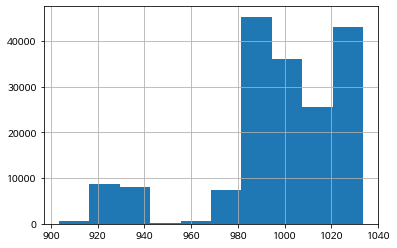

In [ ]:
wwdata2012['현지기압(hPa)'].hist()

In [ ]:
wwdata2013[wwdata2013["강수량(mm)"].isna()] # 첫날만 결측치 존재

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향,습도(%),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),지면온도(°C),date,hour,place,year,month,day
0,90,속초,2013-01-01 00:00:00,-4.9,NaN,6.1,250.0,43.0,-15.5,1016.7,1019.0,NaN,NaN,-4.9,2013-01-01,0,속초,2013,1,1
1,90,속초,2013-01-01 01:00:00,-4.6,NaN,5.5,250.0,42.0,-15.5,1016.8,1019.1,NaN,NaN,-4.7,2013-01-01,1,속초,2013,1,1
2,90,속초,2013-01-01 02:00:00,-4.4,NaN,4.3,270.0,41.0,-15.7,1017.4,1019.7,NaN,NaN,-4.7,2013-01-01,2,속초,2013,1,1
3,90,속초,2013-01-01 03:00:00,-5.0,NaN,3.5,250.0,45.0,-15.1,1017.4,1019.7,NaN,NaN,-4.9,2013-01-01,3,속초,2013,1,1
4,90,속초,2013-01-01 04:00:00,-5.9,NaN,2.7,290.0,53.0,-13.9,1017.0,1019.3,NaN,NaN,-5.6,2013-01-01,4,속초,2013,1,1
5,90,속초,2013-01-01 05:00:00,-5.3,NaN,2.1,180.0,50.0,-14.1,1016.2,1018.5,NaN,NaN,-5.8,2013-01-01,5,속초,2013,1,1
6,90,속초,2013-01-01 06:00:00,-5.6,NaN,1.5,200.0,52.0,-13.9,1015.9,1018.2,NaN,NaN,-6.1,2013-01-01,6,속초,2013,1,1
7,90,속초,2013-01-01 07:00:00,-6.2,NaN,2.1,250.0,56.0,-13.5,1015.5,1017.8,NaN,NaN,-5.7,2013-01-01,7,속초,2013,1,1
8,90,속초,2013-01-01 08:00:00,-6.1,NaN,0.8,200.0,56.0,-13.4,1015.3,1017.6,0.0,NaN,-5.1,2013-01-01,8,속초,2013,1,1
9,90,속초,2013-01-01 09:00:00,-4.6,NaN,1.1,250.0,56.0,-12.0,1015.0,1017.3,0.0,NaN,-3.8,2013-01-01,9,속초,2013,1,1


# DATA

## 전체 + 산불 여부 컬럼 d2012~d2021

In [ ]:
d=pd.DataFrame()
for i in range(2012,2022,1):
  d=pd.concat( [ d, globals()["wwdata{}".format(i)] ] )

In [ ]:
ddd=pd.merge(d,sanbul4,how='outer')

In [ ]:
ddd=ddd[['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향', '습도(%)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)',
       '지면온도(°C)', 'date', 'hour', 'place', 'year', 'month', 'day', '발생',
       '진화', '진화시간','진화시간_분','발생장소_시군구', '발생장소_읍면',
       '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타', '피해면적_합계']]

In [ ]:
for k in ddd[ ddd['진화'].notna() ].index :# 산불 발생한 시기의 index
    ddd.loc[k,'기온_48']=ddd.loc[k-48:k-1,'기온(°C)'].mean() # 48시간 평균 기온
    ddd.loc[k,'강수량_48']=ddd.loc[k-48:k-1,'강수량(mm)'].mean() # 48시간 평균 강수량

In [ ]:
ddd=ddd[ddd['진화'].notna()]

ddd.columns = ['지점', '지점명', '일시', '기온', '강수량', '풍속', '풍향', '습도',
       '이슬점온도', '현지기압', '해면기압', '일조', '일사',
       '지면온도', 'date', 'hour', 'place', 'year', 'month', 'day',
       '발생', '진화', '진화시간','진화시간_분','발생장소_시군구', '발생장소_읍면',
       '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타',
       '피해면적_합계','기온_48','강수량_48']

In [ ]:
ddd=ddd.sort_values('일시')
ddd.reset_index(inplace=True)

# DATA - 공통

In [ ]:
d1221=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/산불/data_1.csv',encoding='cp949')

In [ ]:
d1221.isna().sum()

Unnamed: 0      0
year            0
month           0
day             0
hour            0
발생일시_요일         0
진화종료시간_년        0
진화종료시간_월        0
진화종료시간_일        0
진화종료시간_시간       0
발생장소_관서         0
발생장소_시도         0
발생장소_시군구        0
발생장소_읍면         8
발생장소_동리        28
발생원인_구분         0
발생원인_세부원인       0
발생원인_기타       477
피해면적_합계         0
발생              0
진화              0
진화시간            0
진화시간_분          0
진화시간_시간         0
기온              0
강수량             0
풍속              0
풍향              0
습도              0
증기압             0
이슬점온도           0
해면기압            0
현지기압            0
일조              0
지면온도            0
dtype: int64

In [ ]:
set(d1221['발생장소_시군구'])

{'강릉',
 '고성',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성'}

In [ ]:
d1221[d1221['발생']=='2021-06-07 15:13:00'].iloc[:,1:]

,year,month,day,hour,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,발생장소_관서,...,강수량,풍속,풍향,습도,증기압,이슬점온도,해면기압,현지기압,일조,지면온도
709,2021,6,7,15,월,2021,6,7,17:00,강원,...,0.0,3.0,230.0,40.0,16.2,14.2,1008.4,1011.4,0.1,28.1
710,2021,6,7,15,월,2021,6,7,16:00,강원,...,0.0,3.0,230.0,40.0,16.2,14.2,1008.4,1011.4,0.1,28.1


In [ ]:
d1221=d1221.drop(710) #공통된 행 제거

In [ ]:
d1221

,Unnamed: 0,year,month,day,hour,발생일시_요일,진화종료시간_년,진화종료시간_월,진화종료시간_일,진화종료시간_시간,...,강수량,풍속,풍향,습도,증기압,이슬점온도,해면기압,현지기압,일조,지면온도
0,0,2012,1,11,15,수,2012,1,11,16:50,...,2.0,1.3,290.0,22.0,1.3,-20.0,1011.5,1029.5,1.0,3.2
1,1,2012,2,5,16,일,2012,2,5,16:49,...,0.0,2.5,244.0,15.0,7.8,-19.7,982.4,1021.9,0.0,8.9
2,2,2012,2,16,14,목,2012,2,16,15:15,...,0.0,3.3,320.0,14.0,1.0,-22.3,1002.6,1021.1,1.0,11.1
3,3,2012,3,12,15,월,2012,3,12,16:40,...,0.0,2.6,271.4,20.8,1.7,-16.3,982.4,1021.9,0.0,-12.6
4,4,2012,3,30,17,금,2012,3,30,19:00,...,0.0,3.8,270.3,30.2,1.7,-16.3,982.4,1021.9,0.0,-12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,713,2021,8,10,14,화,2021,8,10,16:24,...,6.0,3.1,180.0,58.0,26.0,21.7,998.2,1006.6,0.8,46.7
714,714,2021,11,14,21,일,2021,11,15,03:00,...,0.0,1.0,244.8,61.4,1.7,-16.3,992.4,1032.6,0.0,-12.6
715,715,2021,11,29,13,월,2021,11,29,15:40,...,0.0,0.9,250.2,41.2,1.7,-16.3,992.4,1032.6,0.0,-12.6
716,716,2021,12,19,15,일,2021,12,19,16:20,...,1.1,2.8,250.0,22.0,2.2,-13.5,1015.4,1018.7,1.0,10.3


# DATA *

### graph

year
2012     43
2013     36
2014     73
2015    125
2016     91
2017    103
2018     47
2019     78
2020     73
2021     48
dtype: int64


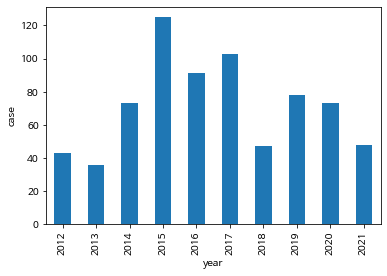

In [ ]:
print(d1221.groupby('year').size())
d1221.groupby('year').size().plot(kind='bar')
plt.xlabel('year')
plt.ylabel('case')
plt.show()

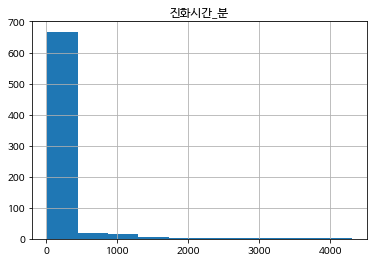

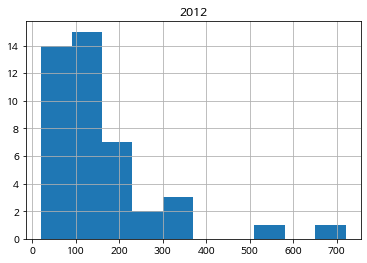

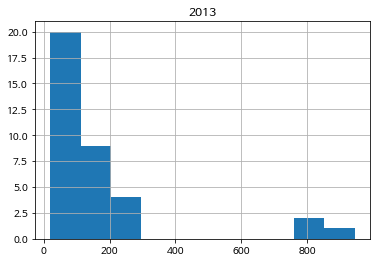

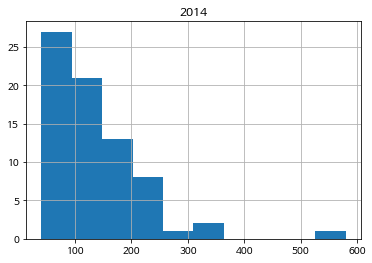

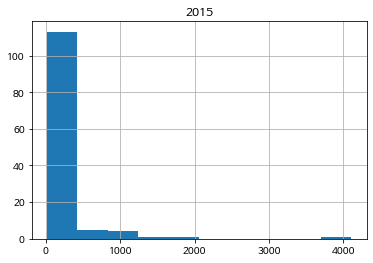

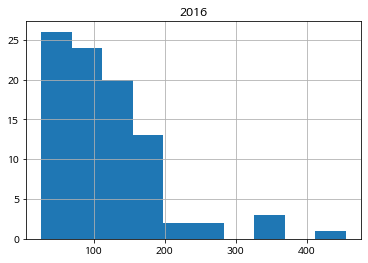

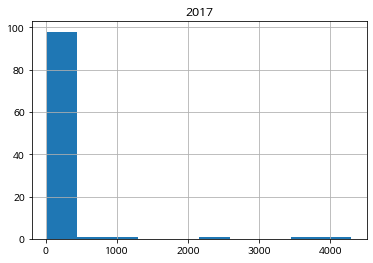

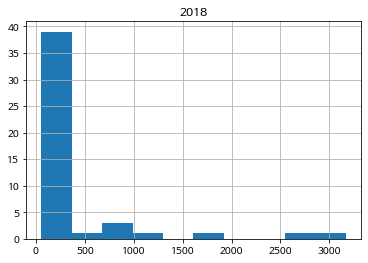

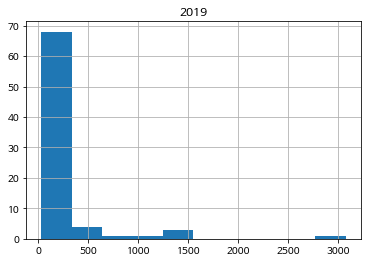

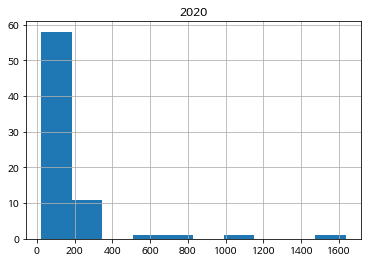

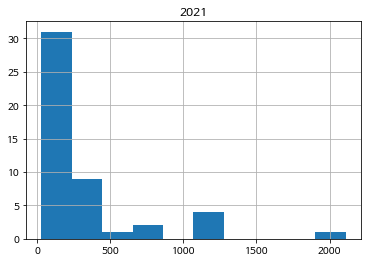

In [ ]:
# 진화시간
d1221.hist(column='진화시간_분')
plt.show()

for i in range(2012,2022,1):
  d1221[d1221['year']==i].hist(column='진화시간_분')
  plt.title(i)
  plt.show()

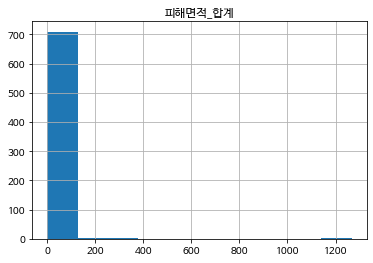

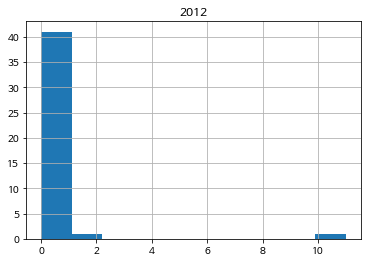

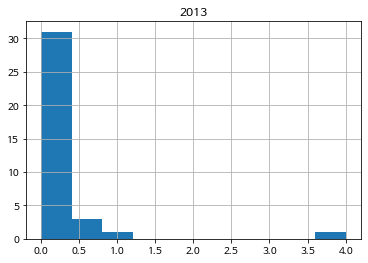

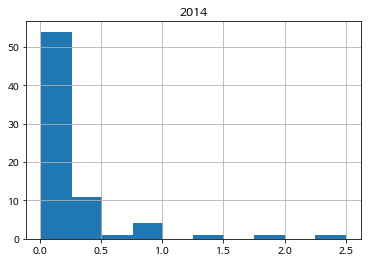

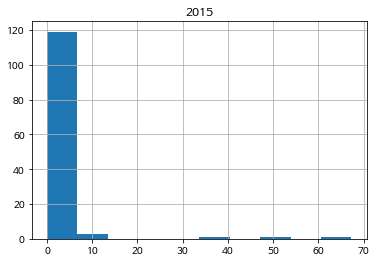

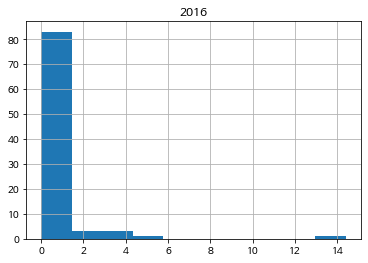

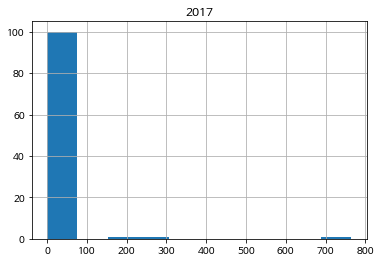

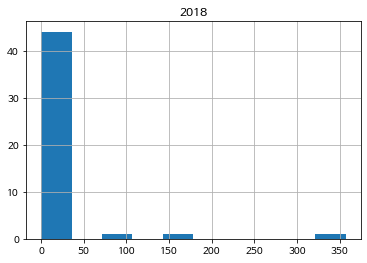

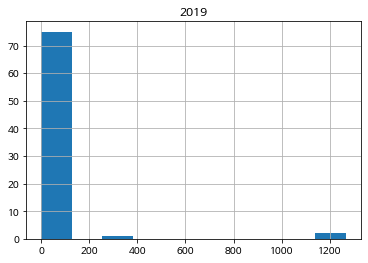

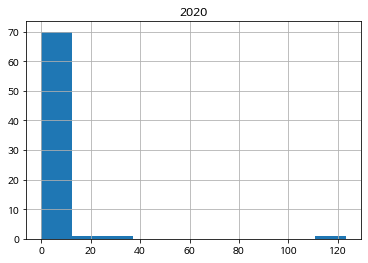

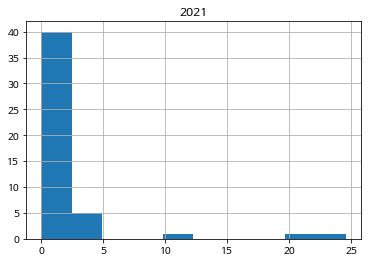

In [ ]:
# 피해면적 합계
d1221.hist(column='피해면적_합계')
plt.show()

for i in range(2012,2022,1):
  d1221[d1221['year']==i].hist(column='피해면적_합계')
  plt.title(i)
  plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


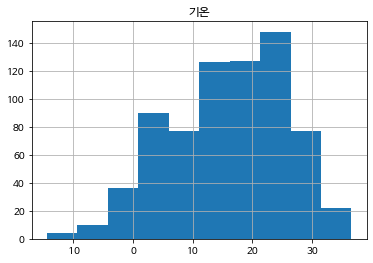

In [ ]:
# 기온
d1221.hist(column='기온')
plt.show()

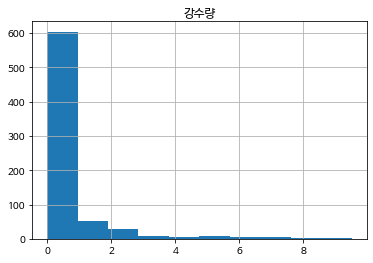

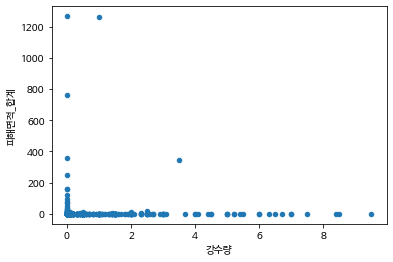

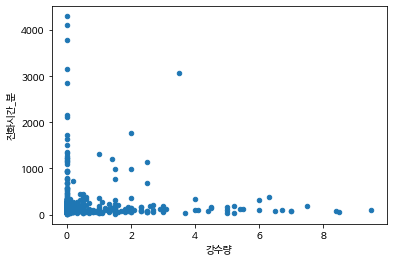

In [ ]:
# 강수량
d1221.hist(column='강수량')
plt.show()

d1221.plot.scatter(x='강수량',y='피해면적_합계')
plt.show()

d1221.plot.scatter(x='강수량',y='진화시간_분')
plt.show()

### 결측치

In [ ]:
#data2=data2.reset_index()
d1221.isna().sum()

Unnamed: 0      0
year            0
month           0
day             0
hour            0
발생일시_요일         0
진화종료시간_년        0
진화종료시간_월        0
진화종료시간_일        0
진화종료시간_시간       0
발생장소_관서         0
발생장소_시도         0
발생장소_시군구        0
발생장소_읍면         8
발생장소_동리        28
발생원인_구분         0
발생원인_세부원인       0
발생원인_기타       477
피해면적_합계         0
발생              0
진화              0
진화시간            0
진화시간_분          0
진화시간_시간         0
기온              0
강수량             0
풍속              0
풍향              0
습도              0
증기압             0
이슬점온도           0
해면기압            0
현지기압            0
일조              0
지면온도            0
dtype: int64

### 파생변수 : 피해면적 30ha 이상


In [ ]:
d1221.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'hour', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시도', '발생장소_시군구',
       '발생장소_읍면', '발생장소_동리', '발생원인_구분', '발생원인_세부원인', '발생원인_기타', '피해면적_합계',
       '발생', '진화', '진화시간', '진화시간_분', '진화시간_시간', '기온', '강수량', '풍속', '풍향', '습도',
       '증기압', '이슬점온도', '해면기압', '현지기압', '일조', '지면온도'],
      dtype='object')

In [ ]:
data3=pd.DataFrame(d1221[['year', 'month', 'day', 'hour',
                    '발생장소_시군구', '발생원인_구분', '피해면적_합계','진화시간_분',
                    '기온', '강수량', '풍속', '풍향', '습도', '이슬점온도',
                    '현지기압', '해면기압','일조', '지면온도']])
data3.head(3)

,year,month,day,hour,발생장소_시군구,발생원인_구분,피해면적_합계,진화시간_분,기온,강수량,풍속,풍향,습도,이슬점온도,현지기압,해면기압,일조,지면온도
0,2012,1,11,15,홍천,입,0.03,95.0,-0.9,2.0,1.3,290.0,22.0,-20.0,1029.5,1011.5,1.0,3.2
1,2012,2,5,16,고성,입,0.20,21.0,8.4,0.0,2.5,244.0,15.0,-19.7,1021.9,982.4,0.0,8.9
2,2012,2,16,14,원주,건,0.10,70.0,2.6,0.0,3.3,320.0,14.0,-22.3,1021.1,1002.6,1.0,11.1


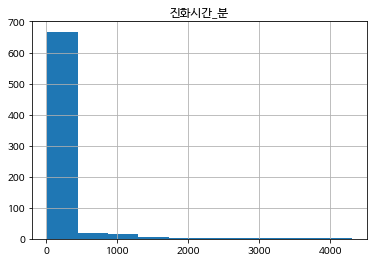

In [ ]:
data3.hist(column='진화시간_분')
plt.show()

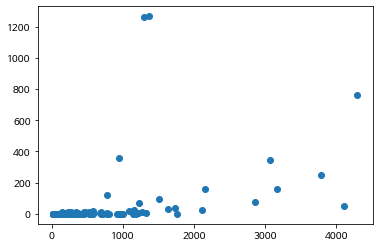

In [ ]:
plt.scatter(data3['진화시간_분'],data3['피해면적_합계'])
plt.show()

In [ ]:
# 대형산불
data4 = data3
data4['대형산불']=0

# 30 ha 이상

for i in data3.index:
  if i in data3[ data3['피해면적_합계']>=30 ].index :
    data4['대형산불'][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data4.head(3)

,year,month,day,hour,발생장소_시군구,발생원인_구분,피해면적_합계,진화시간_분,기온,강수량,풍속,풍향,습도,이슬점온도,현지기압,해면기압,일조,지면온도,대형산불
0,2012,1,11,15,홍천,입,0.03,95.0,-0.9,2.0,1.3,290.0,22.0,-20.0,1029.5,1011.5,1.0,3.2,0
1,2012,2,5,16,고성,입,0.20,21.0,8.4,0.0,2.5,244.0,15.0,-19.7,1021.9,982.4,0.0,8.9,0
2,2012,2,16,14,원주,건,0.10,70.0,2.6,0.0,3.3,320.0,14.0,-22.3,1021.1,1002.6,1.0,11.1,0


In [ ]:
# 계절
# 봄(3~5월)	 여름(6~8월)	가을(9~11월)	겨울(12,1~2월)
data4['season']=''
for i in data4.index:
  if i in data4[ (data4['month']==3) | (data4['month']==4) | (data4['month']==5) ].index:
    data4['season'][i]='봄'
  elif i in data4[ (data4['month']==6) | (data4['month']==7) | (data4['month']==8) ].index:
    data4['season'][i]='여름'
  elif i in data4[ (data4['month']==9) | (data4['month']==10) | (data4['month']==11) ].index:
    data4['season'][i]='가을'
  elif i in data4[ (data4['month']==12) | (data4['month']==1) | (data4['month']==2) ].index:
    data4['season'][i]='겨울'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarn

In [ ]:
data4.head(2)

,year,month,day,hour,발생장소_시군구,발생원인_구분,피해면적_합계,진화시간_분,기온,강수량,풍속,풍향,습도,이슬점온도,현지기압,해면기압,일조,지면온도,대형산불,season
0,2012,1,11,15,홍천,입,0.03,95.0,-0.9,2.0,1.3,290.0,22.0,-20.0,1029.5,1011.5,1.0,3.2,0,겨울
1,2012,2,5,16,고성,입,0.20,21.0,8.4,0.0,2.5,244.0,15.0,-19.7,1021.9,982.4,0.0,8.9,0,겨울


## PCA

#### 정규화 (data5)

강수량 = log (+1).  
풍속 = log (+1).  
습도 = log (+1)   
지면온도 = sqrt(+12.6)

진화시간 = log(+1)  
피해면적 = log  

*기압 - 혼합모델  
*풍향 0-360 일조 0-1   
*피해면적 이상치

In [ ]:
data5 = data4

import seaborn as sns
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



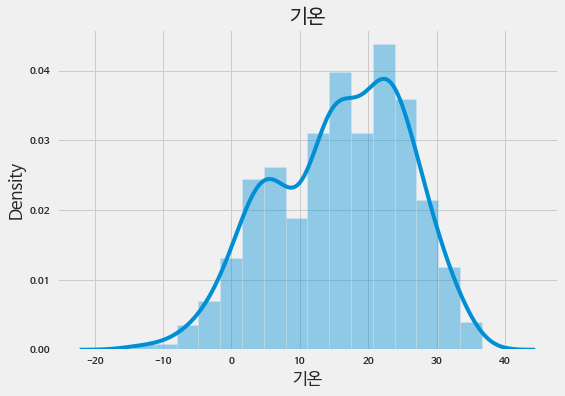

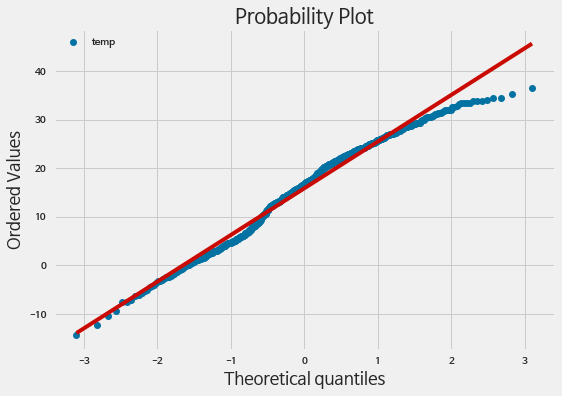

In [ ]:
sns.distplot(data5['기온'])
plt.title('기온')
plt.show()

stats.probplot(data5.기온 , dist=stats.norm,plot=plt)
plt.legend(['temp'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



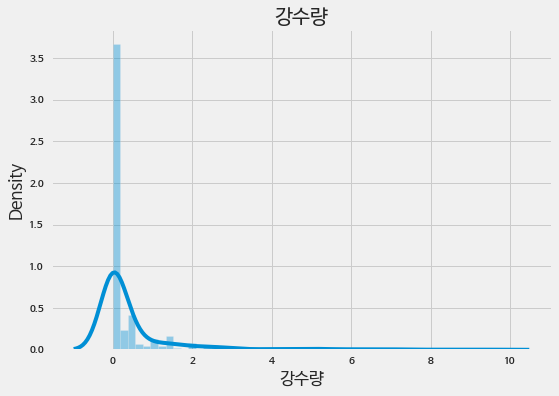

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



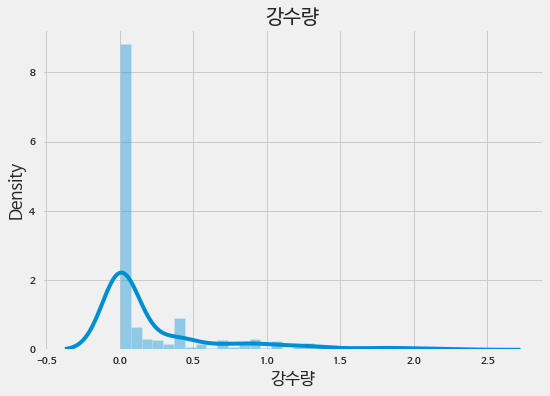

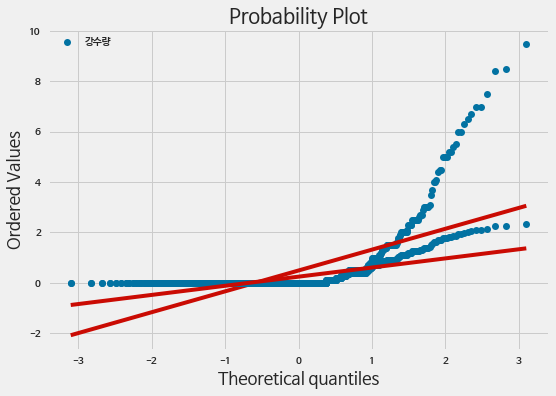

In [ ]:
# 강수량
sns.distplot(data5['강수량'])
plt.title('강수량')
plt.show()

sns.distplot(np.log1p(data5['강수량']))
plt.title('강수량')
plt.show()

stats.probplot(data5.강수량 , dist=stats.norm,plot=plt)
plt.legend(['강수량'])

stats.probplot(np.log1p(data5.강수량) , dist=stats.norm,plot=plt)
plt.show()

data5['강수량log']=np.log1p(data4['강수량'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



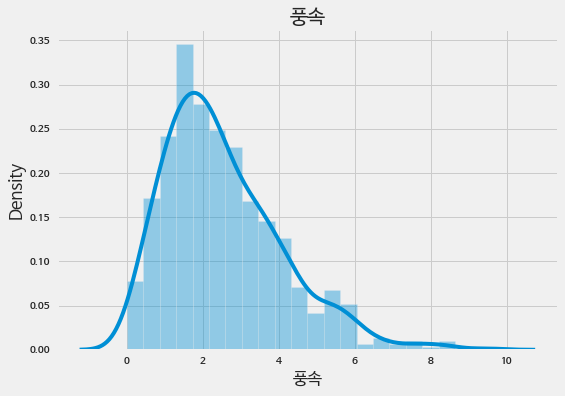

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



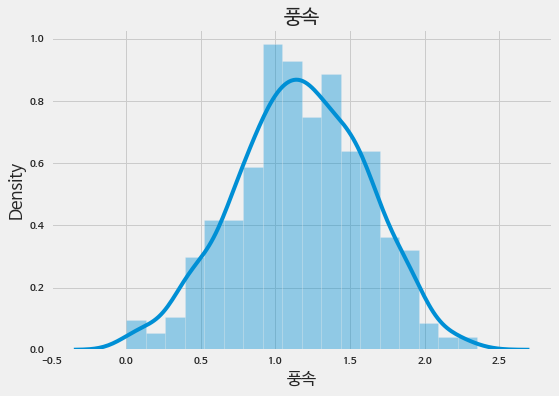

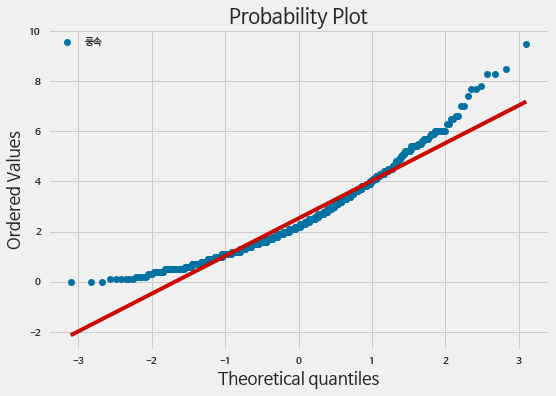

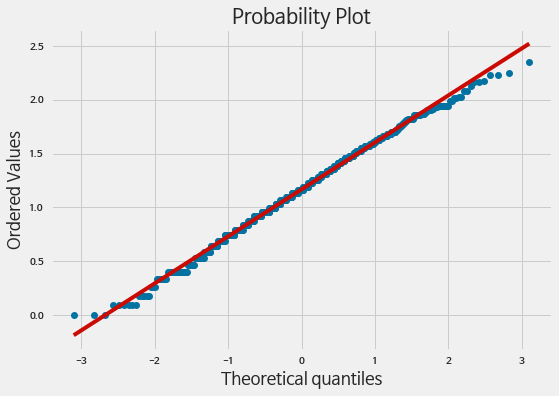

In [ ]:
# 풍속
sns.distplot(data5['풍속'])
plt.title('풍속')
plt.show()

sns.distplot(np.log1p(data5['풍속']))
plt.title('풍속')
plt.show()

stats.probplot(data5.풍속 , dist=stats.norm,plot=plt)
plt.legend(['풍속'])
plt.show()

stats.probplot(np.log1p(data5.풍속) , dist=stats.norm,plot=plt)
plt.show()

data5['풍속log']=np.log1p(data4['풍속'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



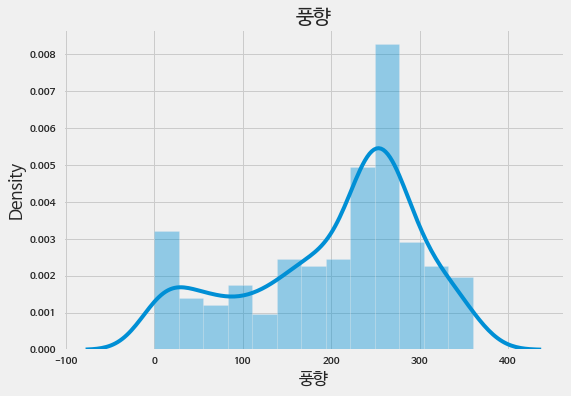

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



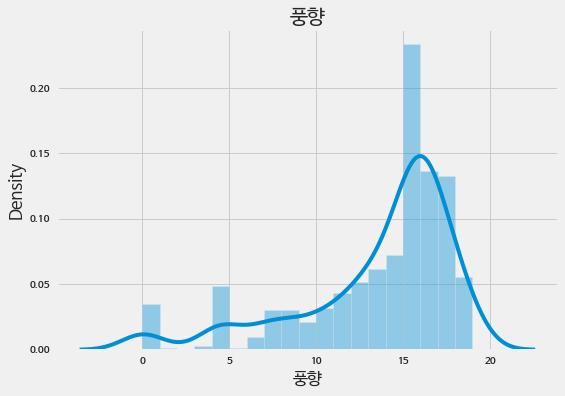

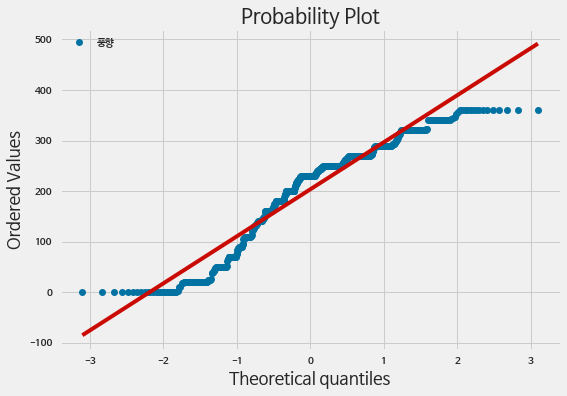

In [ ]:
# 풍향
sns.distplot(data5['풍향'])
plt.title('풍향')
plt.show()

sns.distplot(np.sqrt(data5['풍향']))
plt.title('풍향')
plt.show()

stats.probplot(data5.풍향 , dist=stats.norm,plot=plt)
plt.legend(['풍향'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



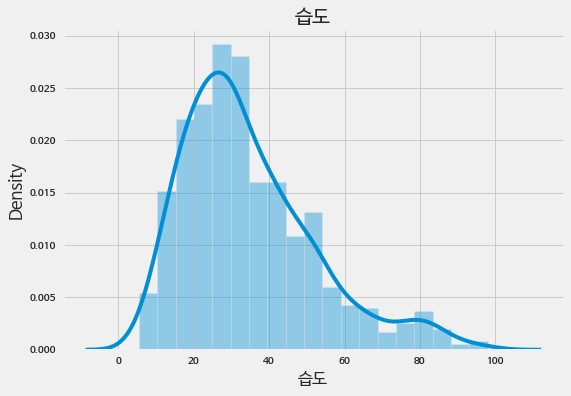

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



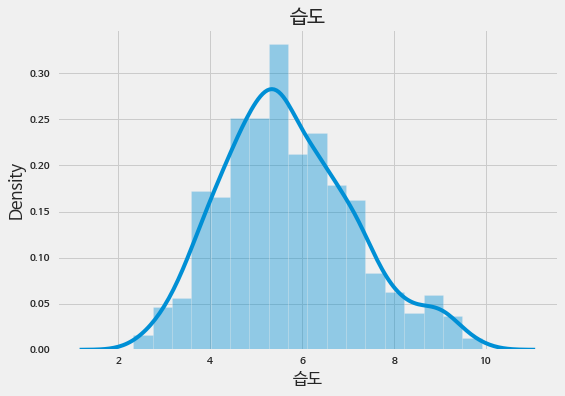

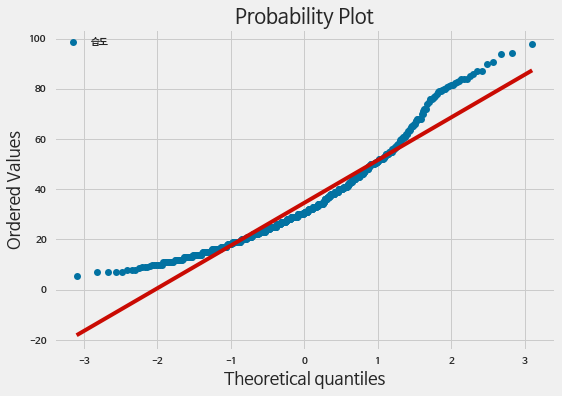

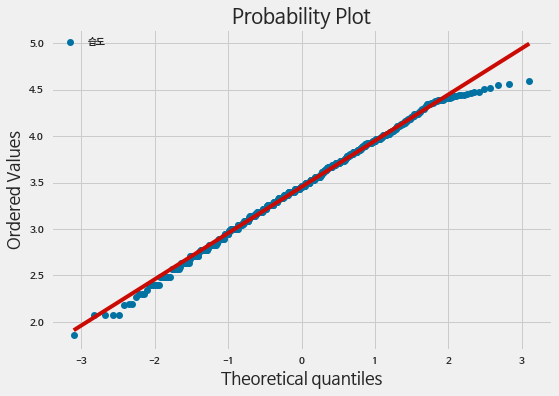

In [ ]:
# 습도
sns.distplot(data5['습도'])
plt.title('습도')
plt.show()

sns.distplot(np.sqrt(data5['습도']))
plt.title('습도')
plt.show()

stats.probplot(data5.습도 , dist=stats.norm,plot=plt)
plt.legend(['습도'])
plt.show()

stats.probplot(np.log1p(data5.습도), dist=stats.norm,plot=plt)
plt.legend(['습도'])
plt.show()

data5['습도log']=np.log1p(data4['습도'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



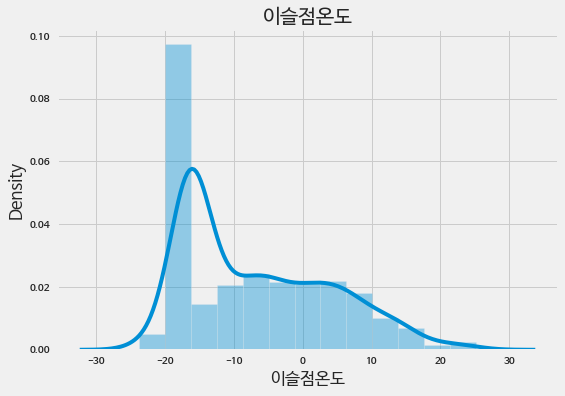

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



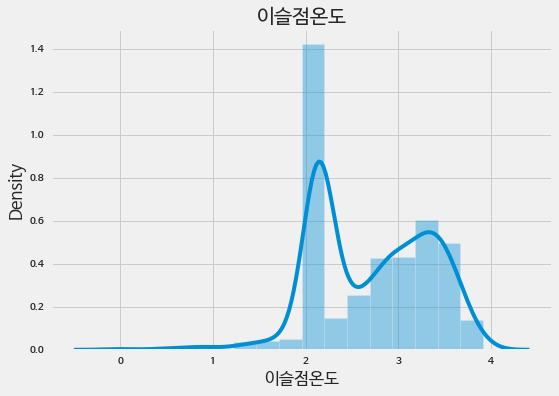

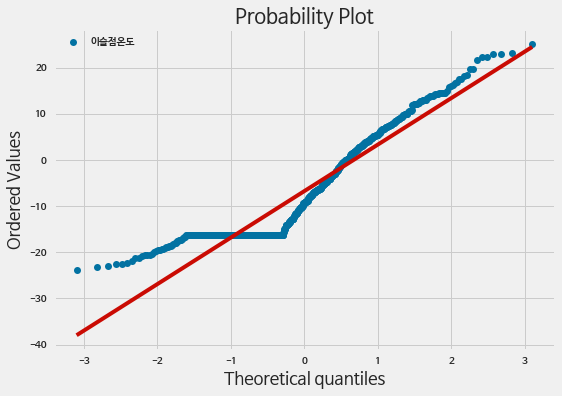

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log1p

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in log1p



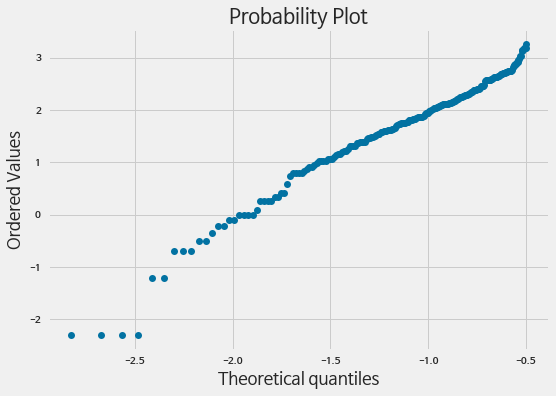

In [ ]:
# 이슬점온도 - 그대로
sns.distplot(data5['이슬점온도'])
plt.title('이슬점온도')
plt.show()

sns.distplot(np.log(data5['이슬점온도']+24.8))
plt.title('이슬점온도')
plt.show()

stats.probplot(data5.이슬점온도 , dist=stats.norm,plot=plt)
plt.legend(['이슬점온도'])
plt.show()

stats.probplot(np.log1p(data5.이슬점온도) , dist=stats.norm,plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



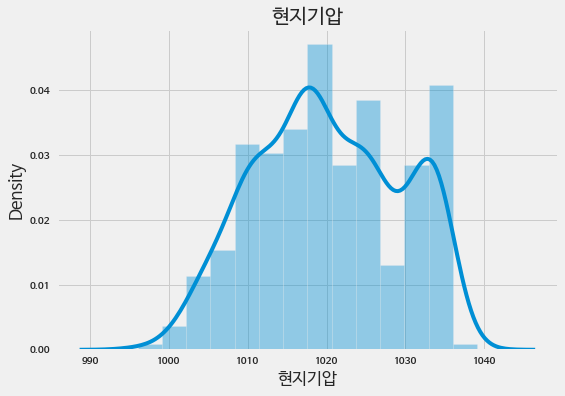

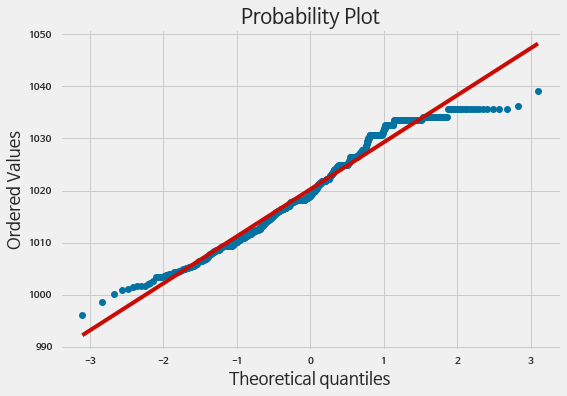

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



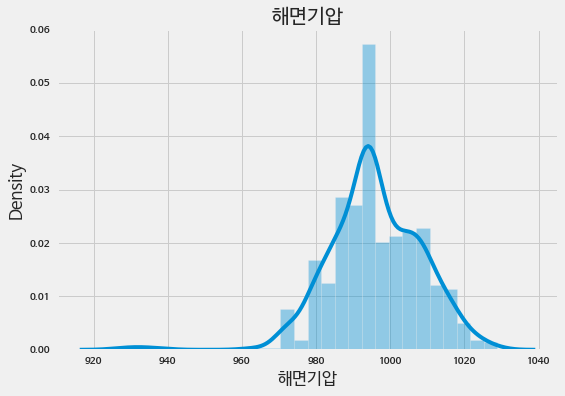

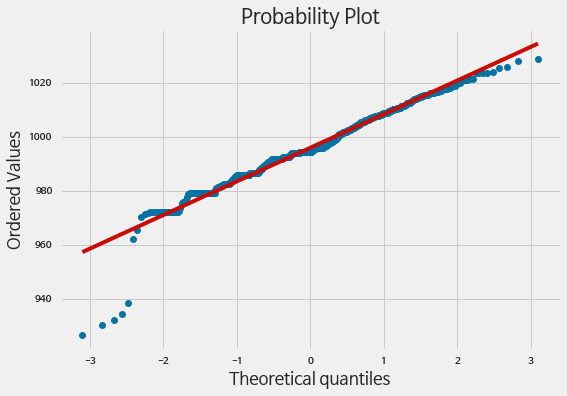

In [ ]:
# 현지기압
sns.distplot(data5['현지기압'])
plt.title('현지기압')
plt.show()

stats.probplot(data5.현지기압 , dist=stats.norm,plot=plt)
plt.show()


# 해면기압
sns.distplot(data5['해면기압'])
plt.title('해면기압')
plt.show()

stats.probplot(data5.해면기압 , dist=stats.norm,plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



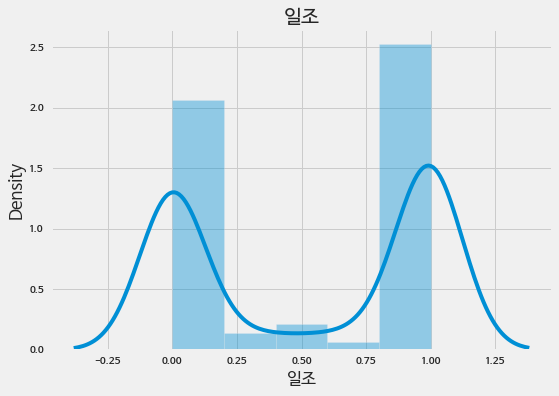

In [ ]:
# 일조 - 두 개의 혼합 모델 (낮 밤)
sns.distplot(data5['일조'])
plt.title('일조')
plt.show()

In [ ]:
print(min(data5['지면온도']))

print(data5['지면온도'].skew())
print(np.log(data5['지면온도']+13.6).skew())
print(np.sqrt(data5['지면온도']+12.6).skew())

-12.6
0.2618392782080927
-0.5524491433625519
-0.32189793554567425


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



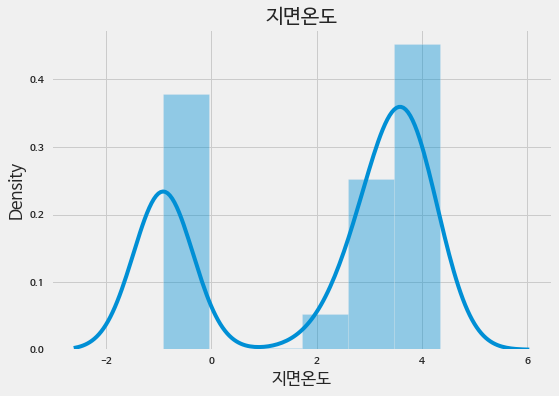

In [ ]:
sns.distplot(np.log(data4['지면온도']+13))
plt.title('지면온도')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



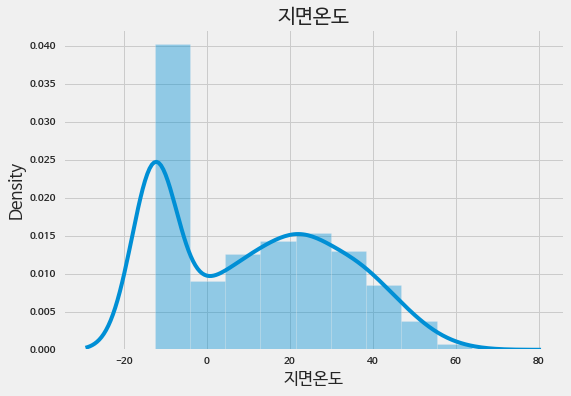

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



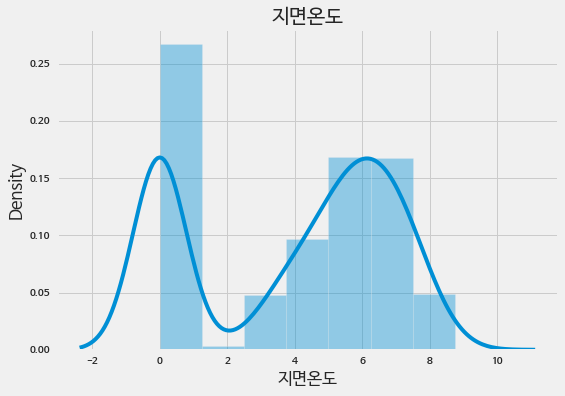

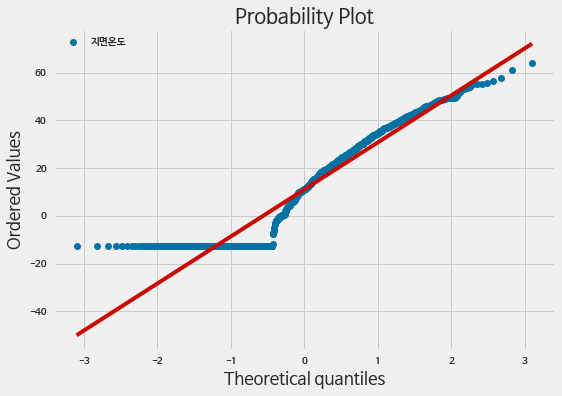

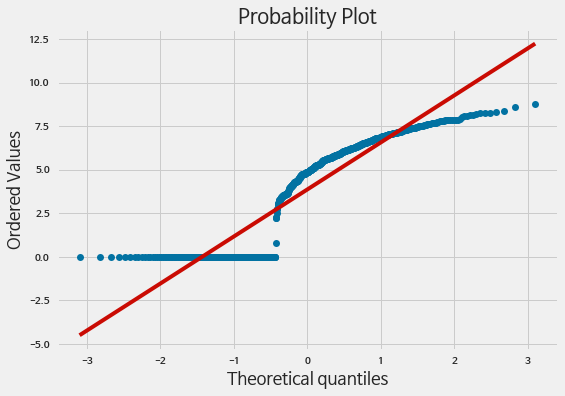

In [ ]:
# 지면온도
sns.distplot(data5['지면온도'])
plt.title('지면온도')
plt.show()

sns.distplot(np.sqrt(data5['지면온도']+12.6))
plt.title('지면온도')
plt.show()

stats.probplot(data5.지면온도 , dist=stats.norm,plot=plt)
plt.legend(['지면온도'])
plt.show()

stats.probplot(np.sqrt(data5.지면온도+12.6) , dist=stats.norm,plot=plt)
plt.show()

data5['지면온도sqrt']=np.sqrt(data4['지면온도']+12.6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



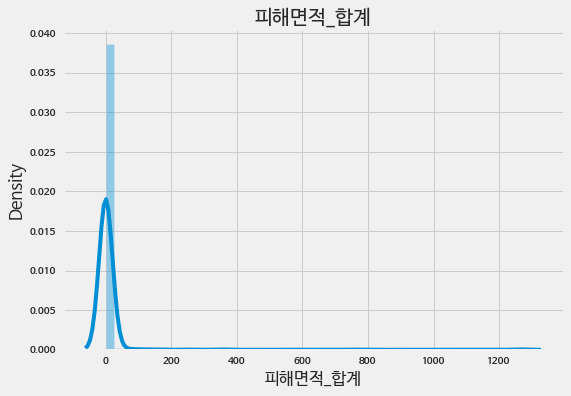

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



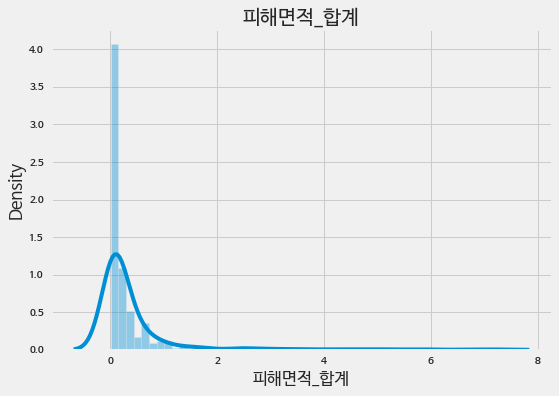

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



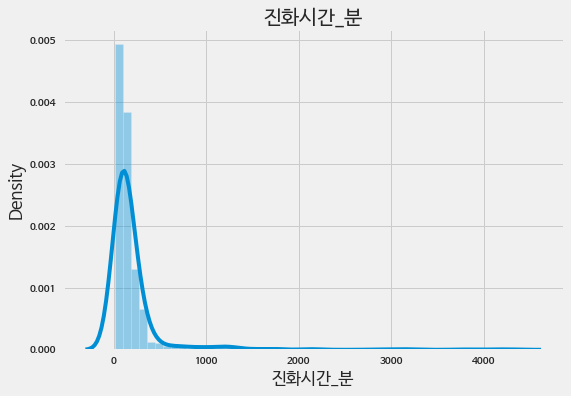

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



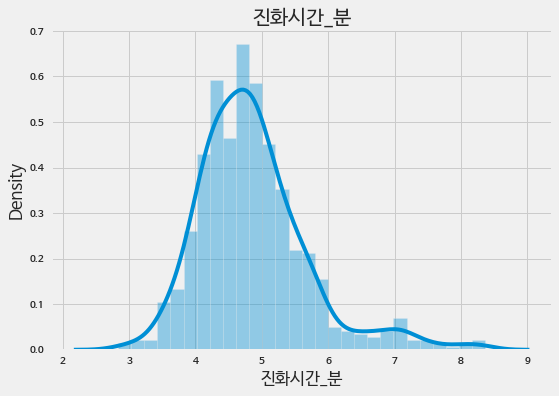

In [ ]:
# 피해면적_합계

sns.distplot(data5['피해면적_합계'])
plt.title('피해면적_합계')
plt.show()

sns.distplot(np.log1p(data5['피해면적_합계']))
plt.title('피해면적_합계')
plt.show()

# 진화시간_분

sns.distplot(data5['진화시간_분'])
plt.title('진화시간_분')
plt.show()


sns.distplot(np.log1p(data5['진화시간_분']))
plt.title('진화시간_분')
plt.show()

data5['진화시간_분log']=np.log1p(data4['진화시간_분'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



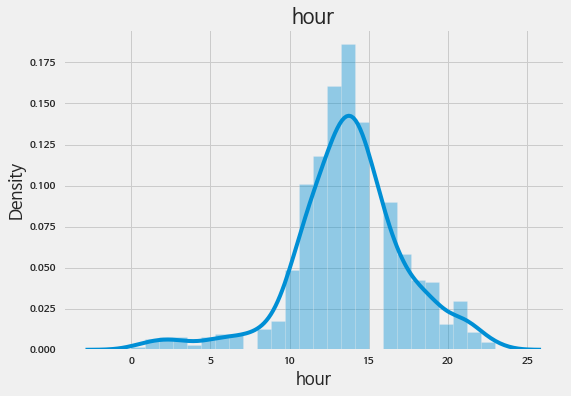

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



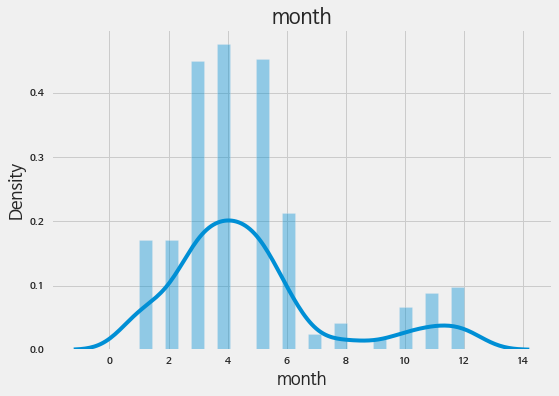

In [ ]:
# hour
sns.distplot(data5['hour'])
plt.title('hour')
plt.show()

# month
sns.distplot(data5['month'])
plt.title('month')
plt.show()

In [ ]:
data5.corr()

,index,year,month,day,hour,피해면적_합계,진화시간_분,기온,강수량,풍속,...,현지기압,해면기압,일조,지면온도,대형산불,강수량log,풍속log,습도log,지면온도sqrt,진화시간_분log
index,1.000000,0.987691,0.074915,-0.096541,-0.018801,0.069073,0.078011,-0.064664,0.098247,-0.002280,...,0.087650,0.071950,0.058625,0.030051,0.059171,0.114716,-0.002530,0.002564,0.032678,0.094148
year,0.987691,1.000000,-0.023795,-0.094155,-0.010603,0.068025,0.083549,-0.121646,0.099743,0.012269,...,0.108694,0.081587,0.061833,0.000844,0.067213,0.114937,0.011315,-0.019063,0.016182,0.092301
month,0.074915,-0.023795,1.000000,-0.038286,-0.049918,-0.029824,-0.051613,0.169536,-0.037704,-0.100662,...,-0.032204,-0.028841,-0.046597,0.067770,-0.086442,-0.033039,-0.105948,0.234037,0.026210,0.017653
day,-0.096541,-0.094155,-0.038286,1.000000,-0.047296,-0.086383,-0.019812,0.018014,-0.000129,-0.044632,...,0.081145,-0.032058,-0.049488,-0.095209,-0.097378,0.012756,-0.029047,0.018489,-0.092724,0.060970
hour,-0.018801,-0.010603,-0.049918,-0.047296,1.000000,0.079355,0.047039,0.122882,-0.029084,0.131938,...,-0.034570,-0.058752,-0.058341,0.015123,0.048372,-0.022390,0.155444,-0.213977,0.011390,0.037588
피해면적_합계,0.069073,0.068025,-0.029824,-0.086383,0.079355,1.000000,0.456960,-0.012657,-0.000317,0.238504,...,0.021729,0.000601,-0.072229,-0.051851,0.633453,0.005567,0.168424,-0.060602,-0.052845,0.310128
진화시간_분,0.078011,0.083549,-0.051613,-0.019812,0.047039,0.456960,1.000000,-0.047358,-0.015900,0.155068,...,0.027454,-0.035958,-0.023509,-0.036970,0.758143,-0.018105,0.125805,-0.102212,-0.045659,0.765470
기온,-0.064664,-0.121646,0.169536,0.018014,0.122882,-0.012657,-0.047358,1.000000,0.024779,0.034932,...,-0.389422,-0.268297,0.062973,0.439825,-0.078837,0.008163,0.102992,-0.146228,0.286329,0.072803
강수량,0.098247,0.099743,-0.037704,-0.000129,-0.029084,-0.000317,-0.015900,0.024779,1.000000,0.054661,...,-0.199751,0.121721,0.291355,0.256380,-0.022887,0.946200,0.063700,-0.069235,0.277377,-0.029811
풍속,-0.002280,0.012269,-0.100662,-0.044632,0.131938,0.238504,0.155068,0.034932,0.054661,1.000000,...,-0.169054,-0.135464,0.013494,0.031855,0.224484,0.049938,0.961936,-0.259672,0.022638,0.060889


### 표준화 - 연속형 (scaledata1)

In [ ]:
print(data5.columns)
print(data5.dtypes)

Index(['index', 'year', 'month', 'day', 'hour', '발생장소_시군구', '발생원인_구분',
       '피해면적_합계', '진화시간_분', '기온', '강수량', '풍속', '풍향', '습도', '이슬점온도', '현지기압',
       '해면기압', '일조', '지면온도', '대형산불', 'season', '강수량log', '풍속log', '습도log',
       '지면온도sqrt', '진화시간_분log'],
      dtype='object')
index          int64
year           int64
month          int64
day            int64
hour           int64
발생장소_시군구      object
발생원인_구분       object
피해면적_합계      float64
진화시간_분       float64
기온           float64
강수량          float64
풍속           float64
풍향           float64
습도           float64
이슬점온도        float64
현지기압         float64
해면기압         float64
일조           float64
지면온도         float64
대형산불           int64
season        object
강수량log       float64
풍속log        float64
습도log        float64
지면온도sqrt     float64
진화시간_분log    float64
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardization 평균 0 / 분산 1
# 연속형만
scaler = StandardScaler()
scaledata = scaler.fit_transform(data5[['month', 'hour',
       '기온', '강수량log','풍속log', '풍향',  '습도log',
       '이슬점온도', '현지기압','해면기압', '일조',
       '지면온도sqrt', '진화시간_분log','피해면적_합계']])
scaledata=pd.DataFrame(scaledata)
scaledata.columns= ['month', 'hour',
       '기온', '강수량log','풍속log', '풍향',  '습도log',
       '이슬점온도', '현지기압','해면기압', '일조',
       '지면온도sqrt', '진화시간_분log','피해면적_합계']

In [ ]:
scaledata

,month,hour,기온,강수량log,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt,진화시간_분log,피해면적_합계
0,-1.369524,0.349541,-1.733242,1.836312,-0.768239,0.903362,-0.639386,-1.246855,1.017660,1.230934,0.982301,0.034809,-0.353352,-0.100830
1,-1.004758,0.628939,-0.771629,-0.530074,0.195658,0.424129,-1.369345,-1.218633,0.184987,-1.060745,-1.134651,0.259742,-2.139357,-0.098593
2,-1.004758,0.070142,-1.371345,-0.530074,0.668251,1.215904,-1.499159,-1.463230,0.097338,0.530043,0.982301,0.338399,-0.719048,-0.099909
3,-0.639993,0.349541,-1.164546,-0.530074,0.260332,0.709585,-0.747167,-0.898774,0.184987,-1.060745,-1.134651,-1.316010,-0.486700,-0.099909
4,-0.639993,0.908338,-0.275313,-0.530074,0.920790,0.698125,-0.026053,-0.898774,0.184987,-1.060745,-1.134651,-1.316010,-0.366046,-0.099909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,1.183834,0.070142,1.565193,3.661372,0.558907,-0.242628,1.255467,2.676116,-1.491313,0.183535,0.558911,1.300944,-0.303866,-0.101093
713,2.278130,2.025933,-0.523471,-0.530074,-1.089103,0.432464,1.368163,-0.898774,1.357302,-0.273226,-1.134651,-1.316010,1.051924,-0.084514
714,2.278130,-0.209257,-0.554491,-0.530074,-1.206862,0.488722,0.581402,-0.898774,1.357302,-0.273226,-1.134651,-1.316010,-0.123945,-0.095304
715,2.642896,0.349541,-0.947408,1.068042,0.384459,0.486638,-0.639386,-0.635361,-0.165612,1.538067,0.982301,0.310237,-1.144129,-0.101093


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



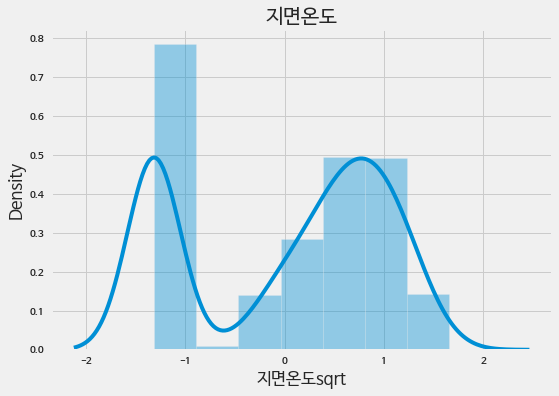

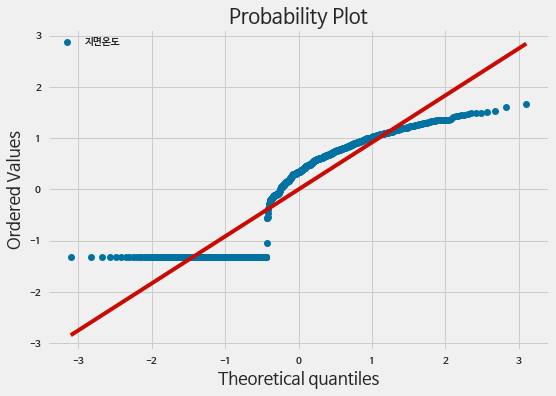

In [ ]:
sns.distplot(scaledata['지면온도sqrt'])
plt.title('지면온도')
plt.show()

stats.probplot(scaledata.지면온도sqrt , dist=stats.norm,plot=plt)
plt.legend(['지면온도'])
plt.show()

In [ ]:
data5.reset_index(inplace=True)

In [ ]:
scaledata1=pd.concat([data5[['발생장소_시군구','발생원인_구분', '대형산불', 'season']],
            scaledata],axis=1)

In [ ]:
scaledata1.reset_index(inplace=True)

In [ ]:
scaledata1

,index,발생장소_시군구,발생원인_구분,대형산불,season,month,hour,기온,강수량log,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt,진화시간_분log,피해면적_합계
0,0,홍천,입,0,겨울,-1.369524,0.349541,-1.733242,1.836312,-0.768239,0.903362,-0.639386,-1.246855,1.017660,1.230934,0.982301,0.034809,-0.353352,-0.100830
1,1,고성,입,0,겨울,-1.004758,0.628939,-0.771629,-0.530074,0.195658,0.424129,-1.369345,-1.218633,0.184987,-1.060745,-1.134651,0.259742,-2.139357,-0.098593
2,2,원주,건,0,겨울,-1.004758,0.070142,-1.371345,-0.530074,0.668251,1.215904,-1.499159,-1.463230,0.097338,0.530043,0.982301,0.338399,-0.719048,-0.099909
3,3,횡성,건,0,봄,-0.639993,0.349541,-1.164546,-0.530074,0.260332,0.709585,-0.747167,-0.898774,0.184987,-1.060745,-1.134651,-1.316010,-0.486700,-0.099909
4,4,양구,건,0,봄,-0.639993,0.908338,-0.275313,-0.530074,0.920790,0.698125,-0.026053,-0.898774,0.184987,-1.060745,-1.134651,-1.316010,-0.366046,-0.099909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,712,춘천,기,0,여름,1.183834,0.070142,1.565193,3.661372,0.558907,-0.242628,1.255467,2.676116,-1.491313,0.183535,0.558911,1.300944,-0.303866,-0.101093
713,713,양양,쓰,0,가을,2.278130,2.025933,-0.523471,-0.530074,-1.089103,0.432464,1.368163,-0.898774,1.357302,-0.273226,-1.134651,-1.316010,1.051924,-0.084514
714,714,횡성,기,0,가을,2.278130,-0.209257,-0.554491,-0.530074,-1.206862,0.488722,0.581402,-0.898774,1.357302,-0.273226,-1.134651,-1.316010,-0.123945,-0.095304
715,715,강릉,기,0,겨울,2.642896,0.349541,-0.947408,1.068042,0.384459,0.486638,-0.639386,-0.635361,-0.165612,1.538067,0.982301,0.310237,-1.144129,-0.101093


### 기상관련변수들 pca (scaledata2)

In [ ]:
scaledata1.columns

Index(['index', '발생장소_시군구', '발생원인_구분', '대형산불', 'season', 'month', 'hour', '기온',
       '강수량log', '풍속log', '풍향', '습도log', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도sqrt', '진화시간_분log', '피해면적_합계'],
      dtype='object')

In [ ]:
scaledata2=pd.DataFrame(scaledata1[['기온',
       '강수량log', '풍속log', '풍향', '습도log', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도sqrt']])

#### 상관관계

In [ ]:
scaledata2.corr()

,기온,강수량log,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt
기온,1.000000,0.008163,0.102992,0.059521,-0.146228,0.459851,-0.389422,-0.268297,0.062973,0.286329
강수량log,0.008163,1.000000,0.056797,0.051787,-0.097385,0.207671,-0.241453,0.179924,0.357525,0.348855
풍속log,0.102992,0.056797,1.000000,0.243097,-0.326413,-0.066801,-0.182266,-0.139993,0.045721,0.048025
풍향,0.059521,0.051787,0.243097,1.000000,-0.280074,-0.016850,-0.024613,0.059416,0.138971,0.088180
습도log,-0.146228,-0.097385,-0.326413,-0.280074,1.000000,0.246376,0.061290,-0.000008,-0.286464,-0.207925
이슬점온도,0.459851,0.207671,-0.066801,-0.016850,0.246376,1.000000,-0.626477,0.083804,0.432269,0.762481
현지기압,-0.389422,-0.241453,-0.182266,-0.024613,0.061290,-0.626477,1.000000,0.210958,-0.468090,-0.679832
해면기압,-0.268297,0.179924,-0.139993,0.059416,-0.000008,0.083804,0.210958,1.000000,0.343691,0.247520
일조,0.062973,0.357525,0.045721,0.138971,-0.286464,0.432269,-0.468090,0.343691,1.000000,0.796971
지면온도sqrt,0.286329,0.348855,0.048025,0.088180,-0.207925,0.762481,-0.679832,0.247520,0.796971,1.000000


In [ ]:
scaledata22=scaledata2
scaledata22.columns=[['기온',
       '강수량', '풍속', '풍향', '습도', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도']]

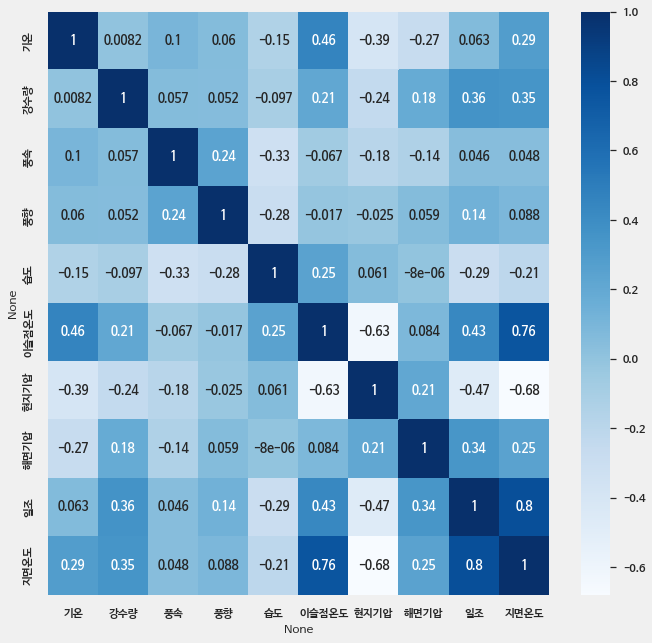

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font="NanumBarunGothic",
rc={"axes.unicode_minus":False}, style='white')
sns.heatmap(data = scaledata2.corr(), annot = True, cmap='Blues')
plt.show()

#### pca

In [ ]:
eig = np.linalg.eig
matrix = np.matrix
testmatrix = scaledata2.corr()

#print(testmatrix) #Eigenvalue와 Eigenvector가 모두 나온다
print(eig(testmatrix)[0]) #Eigenvalue 부분을 출력한다
print(eig(testmatrix)[1]) #Eigenvector 부분을 출력한다.

[3.2793954  1.60807599 1.65436621 0.05397777 0.21797867 0.25194762
 0.59906192 0.70041311 0.77262367 0.86215965]
[[ 0.24416681  0.5046758   0.00408807  0.11433377  0.33248573 -0.14902985
  -0.50189736  0.44898609 -0.15149875  0.25178958]
 [ 0.2507317  -0.26185691 -0.05397262 -0.00596707 -0.03111536 -0.00705027
  -0.09567299  0.5568465   0.40008694 -0.62072308]
 [ 0.07930911  0.21339262 -0.51661756  0.01732304 -0.02833214 -0.14261766
  -0.44316576 -0.56133633  0.2787402  -0.26579483]
 [ 0.0851446  -0.04507929 -0.47275843  0.02645223  0.02390805  0.0242454
   0.29873071  0.19070985  0.55524846  0.57571471]
 [-0.11504045  0.03351669  0.61308688  0.25076461  0.30791935 -0.26601257
  -0.02722479 -0.22303586  0.57341007  0.04496233]
 [ 0.43696894  0.1306241   0.33979524 -0.5336613  -0.5401843  -0.01664219
  -0.14834805 -0.07308555  0.18142752  0.19849352]
 [-0.43589798 -0.28155128 -0.05885335  0.10212114 -0.43670415 -0.60182455
  -0.30446724  0.19950203 -0.04765976  0.17074328]
 [ 0.08648182

In [ ]:
scaledata2

,기온,강수량,풍속,풍향,습도,이슬점온도,현지기압,해면기압,일조,지면온도
0,-1.733242,1.836312,-0.768239,0.903362,-0.639386,-1.246855,1.017660,1.230934,0.982301,0.034809
1,-0.771629,-0.530074,0.195658,0.424129,-1.369345,-1.218633,0.184987,-1.060745,-1.134651,0.259742
2,-1.371345,-0.530074,0.668251,1.215904,-1.499159,-1.463230,0.097338,0.530043,0.982301,0.338399
3,-1.164546,-0.530074,0.260332,0.709585,-0.747167,-0.898774,0.184987,-1.060745,-1.134651,-1.316010
4,-0.275313,-0.530074,0.920790,0.698125,-0.026053,-0.898774,0.184987,-1.060745,-1.134651,-1.316010
...,...,...,...,...,...,...,...,...,...,...
712,1.565193,3.661372,0.558907,-0.242628,1.255467,2.676116,-1.491313,0.183535,0.558911,1.300944
713,-0.523471,-0.530074,-1.089103,0.432464,1.368163,-0.898774,1.357302,-0.273226,-1.134651,-1.316010
714,-0.554491,-0.530074,-1.206862,0.488722,0.581402,-0.898774,1.357302,-0.273226,-1.134651,-1.316010
715,-0.947408,1.068042,0.384459,0.486638,-0.639386,-0.635361,-0.165612,1.538067,0.982301,0.310237


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(scaledata2)
principalDf = pd.DataFrame(data=principalComponents, columns = ['pc1', 'pc2','pc3','pc4'])
principalDf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



,pc1,pc2,pc3,pc4
0,-0.309391,-1.037491,-3.140955,0.610966
1,-1.175337,-1.480339,0.529745,0.224066
2,-0.170344,-2.363897,-1.419721,-0.336296
3,-1.996645,-1.232245,0.562351,0.184501
4,-1.811076,-1.122291,1.176748,0.110323
...,...,...,...,...
712,3.937531,1.421183,0.342100,1.698125
713,-2.656986,0.863655,-0.161887,-0.686374
714,-2.578600,0.415415,-0.231577,-0.706877
715,0.699196,-1.086764,-2.094769,0.461801


In [ ]:
print('=============PCA result summary===============')
print(pca.singular_values_)
print(pca.components_.T)
print(np.sqrt(pca.explained_variance_))
print(pca.explained_variance_ratio_)
print(pca.noise_variance_)

=============PCA result summary===============
[48.49047848 34.44097231 33.95571355 24.86299396]
[[ 0.24416681  0.00408807  0.5046758  -0.25178958]
 [ 0.2507317  -0.05397262 -0.26185691  0.62072308]
 [ 0.07930911 -0.51661756  0.21339262  0.26579483]
 [ 0.0851446  -0.47275843 -0.04507929 -0.57571471]
 [-0.11504045  0.61308688  0.03351669 -0.04496233]
 [ 0.43696894  0.33979524  0.1306241  -0.19849352]
 [-0.43589798 -0.05885335 -0.28155128 -0.17074328]
 [ 0.08648182  0.04728721 -0.65158879 -0.27307806]
 [ 0.43534897 -0.08687859 -0.30961695 -0.00523719]
 [ 0.52228882  0.04573824 -0.10619316 -0.06353687]]
[1.81217426 1.28711957 1.2689846  0.92917371]
[0.32793954 0.16543662 0.1608076  0.08621596]
0.4332714085246037


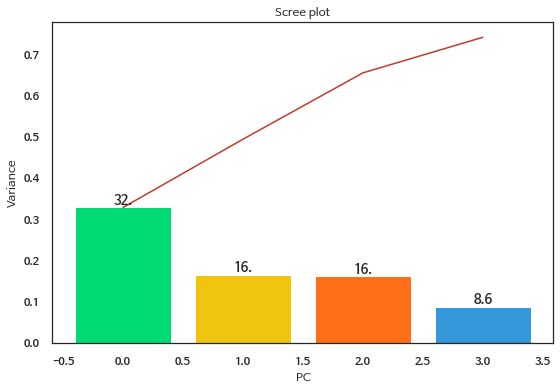

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot

    for i in range(num_components): #라벨링(바 위에 텍스트(annotation) 쓰기)
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)

    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')

scree_plot(pca)

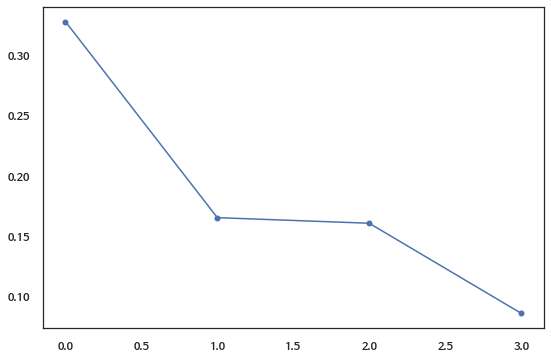

In [ ]:
plt.plot(pca.explained_variance_ratio_,'o-')
plt.show()

In [ ]:
sum(pca.explained_variance_ratio_)

0.7403997251015764

#### biplot

In [ ]:
scaledata2.columns

MultiIndex([(   '기온',),
            (  '강수량',),
            (   '풍속',),
            (   '풍향',),
            (   '습도',),
            ('이슬점온도',),
            ( '현지기압',),
            ( '해면기압',),
            (   '일조',),
            ( '지면온도',)],
           )

In [ ]:
pca_loading=pd.DataFrame(np.round(pca.components_.T,4),
                         columns=['pc1','pc2','pc3','pc4'],
                         index=['기온', '강수량', '풍속', '풍향', '습도',
                                '이슬점온도', '현지기압', '해면기압', '일조','지면온도'])
pca_loading

,pc1,pc2,pc3,pc4
기온,0.2442,0.0041,0.5047,-0.2518
강수량,0.2507,-0.0540,-0.2619,0.6207
풍속,0.0793,-0.5166,0.2134,0.2658
풍향,0.0851,-0.4728,-0.0451,-0.5757
습도,-0.1150,0.6131,0.0335,-0.0450
이슬점온도,0.4370,0.3398,0.1306,-0.1985
현지기압,-0.4359,-0.0589,-0.2816,-0.1707
해면기압,0.0865,0.0473,-0.6516,-0.2731
일조,0.4353,-0.0869,-0.3096,-0.0052
지면온도,0.5223,0.0457,-0.1062,-0.0635


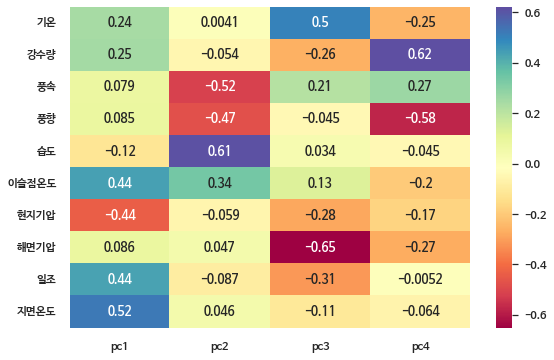

In [ ]:
ax = sns.heatmap(pca_loading, annot=True, cmap='Spectral')
plt.show()

pc1 : 기온이 높을수록, 이슬점온도가 높을수록, 해면기압이 낮을수록, 일조량이 클수록, 지면온도가 클수록, 비가 내릴수록    -> 고온다습, 화창        
pc2 : 기온이 낮을수록, 현지기압이 높을수록, 일조량이 클수록, 강수량이 클수록, 습도가 낮을수록  -> 관측치 높이가 높다..? 저온(겨울)건조        
pc3 : 바람이 안 불수록, 습도가 클수록, 강수량이 클수록, 이슬점온도가 높을수록 -> 비가 오는 / 습한 날.    
pc4 : 현지기압이 낮을수록, 일조량이 낮을수록, 강수량이 클수록, 풍속이 클수록, 지면온도가 낮을수록 -> 흐리고 비 & 바람


In [ ]:
#해면보정 : 수온의 온도 0도 일 때 기압 환산 -> 지질학적 외적 요인 베재 -> 해면 고도에 맞추어서 기압값 환산

In [ ]:
scaledata2['pc1']=principalDf.pc1
scaledata2['pc2']=principalDf.pc2
scaledata2['pc3']=principalDf.pc3
scaledata2['pc4']=principalDf.pc4
scaledata2

,기온,강수량,풍속,풍향,습도,이슬점온도,현지기압,해면기압,일조,지면온도,pc1,pc2,pc3,pc4
0,-1.733242,1.836312,-0.768239,0.903362,-0.639386,-1.246855,1.017660,1.230934,0.982301,0.034809,-0.309391,-1.037491,-3.140955,0.610966
1,-0.771629,-0.530074,0.195658,0.424129,-1.369345,-1.218633,0.184987,-1.060745,-1.134651,0.259742,-1.175337,-1.480339,0.529745,0.224066
2,-1.371345,-0.530074,0.668251,1.215904,-1.499159,-1.463230,0.097338,0.530043,0.982301,0.338399,-0.170344,-2.363897,-1.419721,-0.336296
3,-1.164546,-0.530074,0.260332,0.709585,-0.747167,-0.898774,0.184987,-1.060745,-1.134651,-1.316010,-1.996645,-1.232245,0.562351,0.184501
4,-0.275313,-0.530074,0.920790,0.698125,-0.026053,-0.898774,0.184987,-1.060745,-1.134651,-1.316010,-1.811076,-1.122291,1.176748,0.110323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,1.565193,3.661372,0.558907,-0.242628,1.255467,2.676116,-1.491313,0.183535,0.558911,1.300944,3.937531,1.421183,0.342100,1.698125
713,-0.523471,-0.530074,-1.089103,0.432464,1.368163,-0.898774,1.357302,-0.273226,-1.134651,-1.316010,-2.656986,0.863655,-0.161887,-0.686374
714,-0.554491,-0.530074,-1.206862,0.488722,0.581402,-0.898774,1.357302,-0.273226,-1.134651,-1.316010,-2.578600,0.415415,-0.231577,-0.706877
715,-0.947408,1.068042,0.384459,0.486638,-0.639386,-0.635361,-0.165612,1.538067,0.982301,0.310237,0.699196,-1.086764,-2.094769,0.461801


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


features = ['기온', '강수량', '풍속', '풍향', '습도', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도']
X = scaledata2[features]

pca = PCA(n_components=4)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

#fig = px.scatter(components, x=0, y=1, color=df['species'])
fig = px.scatter(components, x=0, y=1)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



**해면기압 : 현지기압을 그 지점에서 지구의 평균해면에서 관측된 값으로 환산하여 산출한 기압.    
**기압과 온도    
고도가 같다면 기압은 어느 지역이든 같아야 하는데 어떻게 기압이 높고 낮음이 생길 수 있는 걸까. 이유는 태양으로부터 받는 에너지의 차이 때문이다. 지구가 태양으로부터 받는 에너지의 양은 지역에 따라 다르다. 그래서 공기의 밀도 또한 지역에 따라 다르게 나타난다. 태양에너지를 많이 받으면 공기의 밀도가 낮아져 주변보다 기압이 낮아지게 되고, 태양에너지를 적게 받으면 공기의 밀도가 높아져 주변보다 기압이 높아지게 된다.

pc1 = 0.33 기온 + 0.42 이슬점온도 - 0.45 해면기압 + 0.41 일조 + 0.52 * sqrt(지면온도)    
-> 태양에너지를 많이 받는 따뜻한 날씨(화창함), 습하다     
pc2 = -0.45 풍향 0.39 이슬점온도 -0.46 log풍속 + 0.61 log습도    
-> 바람이 안불고 습함. (온도는 관계 없음)      
pc3 = 0.42 기온 - 0.73 현지기압 -0.37 일조 + 0.29 풍속  
 ->   기온이 높고 기압이 낮고(높이가 높음) 일조량도 낮음 바람이 약간 분다.     - 여름에 흐리고 바람 많이 부는 날씨       
pc4 = -0.23 기온 + 0.87 log강수량 + 0.26 log풍속  
-> 비가 오는 날 (바람, 기온낮음)



pc1 : 해면기압(온도 비례,높이반비례) , 일조 , 지면온도 -> 구름이 없고 화창한 (햇빛이 강한) 기상상황    
pc2 : 습도 + 이슬점 온도 + 기온...(바람 없음) - (((이슬점온도가 상대습도와 기온에 의해 결정)))   -> 습한 기상상황 / 불쾌지수 높음     
pc3 : 풍속과 기온이 낮을수록, 습도와 기압은 높을수록 큰 성분 -> 바람이 안 불고 습하면서 추운날 (눈오기 전, 눈오고 다음)     
pc4 : 비오고 바람이 살짝부는 ..


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



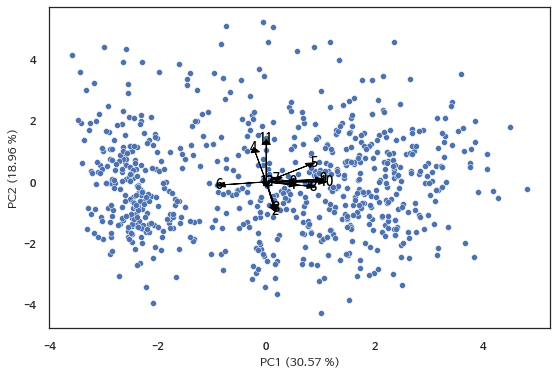

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=4)),])

pca_data = pd.DataFrame(
    pipeline.fit_transform(scaledata2),
    columns = ['pc1', 'pc2','pc3','pc4']
)

pca_step = pipeline.steps[1][1]
loadings = pd.DataFrame(
    pca_step.components_.T,
    columns = ['pc1', 'pc2','pc3','pc4']
)


def loading_plot(
    coeff, labels, scale=1, colors=None, visible=None, ax=plt, arrow_size=0.5
):
    for i, label in enumerate(labels):
        if visible is None or visible[i]:
            ax.arrow(
                0,
                0,
                coeff[i, 0] * scale,
                coeff[i, 1] * scale,
                head_width=arrow_size * scale,
                head_length=arrow_size * scale,
                color="#000" if colors is None else colors[i],
            )
            ax.text(
                coeff[i, 0] * 1.15 * scale,
                coeff[i, 1] * 1.15 * scale,
                label,
                color="#000" if colors is None else colors[i],
                ha="center",
                va="center",
            )


g = sns.scatterplot(data=pca_data, x="pc1", y="pc2")

# Add loadings
loading_plot(loadings[["pc1", "pc2"]].values, loadings.index, scale=2, arrow_size=0.08)


# Add variance explained by the
g.set_xlabel(f"PC1 ({pca_step.explained_variance_ratio_[0]*100:.2f} %)")
g.set_ylabel(f"PC2 ({pca_step.explained_variance_ratio_[1]*100:.2f} %)")

plt.savefig("PCA_with_loadings.png", dpi=200)
plt.show()

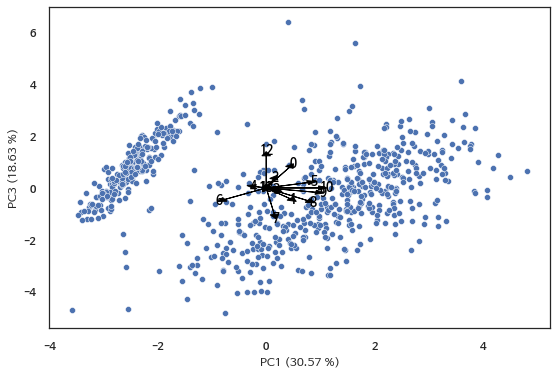

In [ ]:
g = sns.scatterplot(data=pca_data, x="pc1", y="pc3")

# Add loadings
loading_plot(loadings[["pc1", "pc3"]].values, loadings.index, scale=2, arrow_size=0.08)


# Add variance explained by the
g.set_xlabel(f"PC1 ({pca_step.explained_variance_ratio_[0]*100:.2f} %)")
g.set_ylabel(f"PC3 ({pca_step.explained_variance_ratio_[2]*100:.2f} %)")

plt.savefig("PCA_with_loadings.png", dpi=200)
plt.show()

## 다중 대응 분석 MCA
- multiple correspondence analysis

In [ ]:
!pip install mca
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6025 sha256=67bd7c71358e9fef76449c1d8c1056f97a6f01493beb6841fbebf1c5341a69be
  Stored in directory: /root/.cache/pip/wheels/00/46/2a/acfca530ddd1e1d72271e07cb7517611d10cd6bcd05cd0cf34
Successfully built mca
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mca
import prince

In [ ]:
print(scaledata1.columns)
print(scaledata2.columns)

Index(['index', '발생장소_시군구', '발생원인_구분', '대형산불', 'season', 'month', 'hour', '기온',
       '강수량log', '풍속log', '풍향', '습도log', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도sqrt', '진화시간_분log', '피해면적_합계'],
      dtype='object')
MultiIndex([(   '기온',),
            (  '강수량',),
            (   '풍속',),
            (   '풍향',),
            (   '습도',),
            ('이슬점온도',),
            ( '현지기압',),
            ( '해면기압',),
            (   '일조',),
            ( '지면온도',),
            (  'pc1',),
            (  'pc2',),
            (  'pc3',),
            (  'pc4',)],
           )


In [ ]:
pd.crosstab(scaledata1['season'],scaledata1['발생원인_구분'])

발생원인_구분,건,기,담,쓰,입
season,,,,,
가을,0,23,0,4,28
겨울,17,56,11,21,34
봄,22,160,20,47,186
여름,2,32,3,6,45


In [ ]:
input_X=scaledata1[['season','발생원인_구분']]
mca = prince.MCA(n_components=4).fit(input_X)

In [ ]:
# 차원좌표
mca.column_coordinates(input_X)

,0,1,2,3
season_가을,-1.221775,2.236675,0.048779,5.935183e-14
season_겨울,1.438158,0.421451,0.481768,2.484124e-15
season_봄,-0.132741,-0.283385,-0.487057,-5.976122e-15
season_여름,-0.851865,-0.662799,1.616150,-1.115080e-14
발생원인_구분_건,2.098150,-0.231552,0.891383,2.769555e+00
발생원인_구분_기,0.063052,0.752529,0.360195,-5.453659e-01
발생원인_구분_담,1.354015,-2.132789,0.618335,-2.761210e+00
발생원인_구분_쓰,0.776849,0.154308,-1.910057,-8.672153e-02
발생원인_구분_입,-0.715843,-0.457211,-0.021155,4.603680e-01


In [ ]:
print(mca.eigenvalues_)
print(mca.total_inertia_)
print(mca.explained_inertia_)

[0.6152273247363769, 0.5208242591682487, 0.509673946014212, 0.4999999999999999]
3.5
[0.17577923563896483, 0.1488069311909282, 0.145621127432632, 0.14285714285714282]


Text(0.5, 1.0, '상응분석')

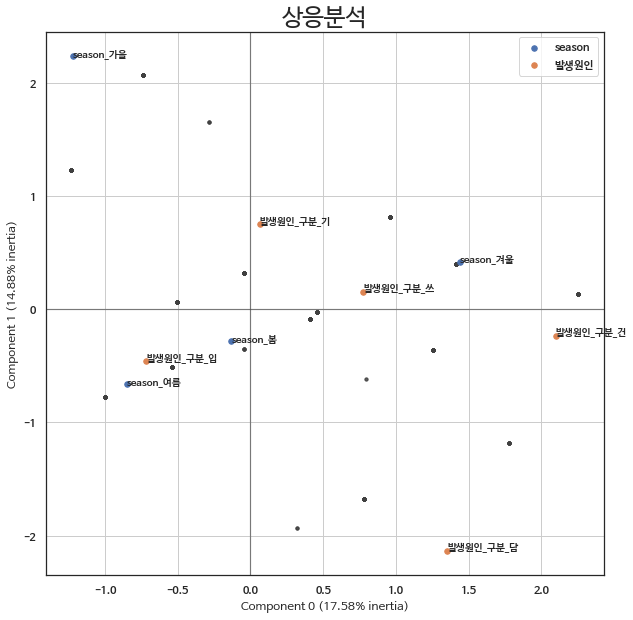

In [ ]:
# 시각화
import matplotlib.pyplot as plt

# 폰트 세팅
font = {'family' : 'NanumBarunGothic',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

# 시각화
ax = mca.plot_coordinates(X = input_X, figsize=(10, 10), show_column_labels=True)
ax.set_title("상응분석", fontsize = 24)

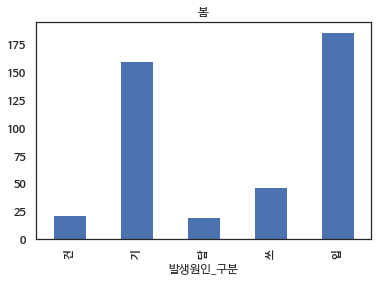

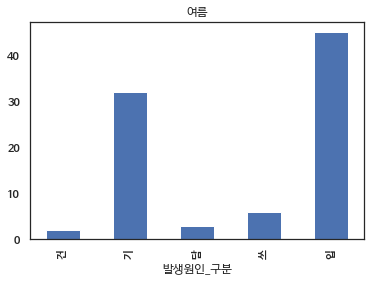

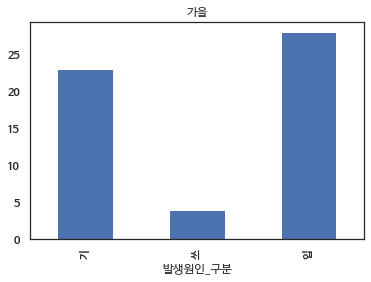

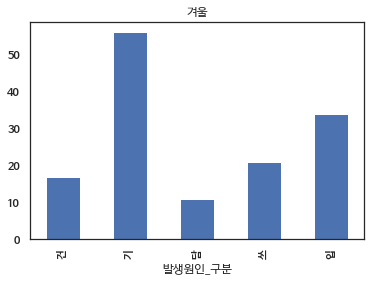

In [ ]:
# 발생 원인 - 장소
for i in ['봄','여름','가을','겨울']:
  scaledata1[scaledata1['season']==i].groupby('발생원인_구분').size().plot(kind='bar')
  plt.title(i)
  plt.show()

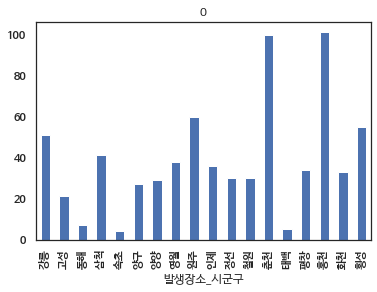

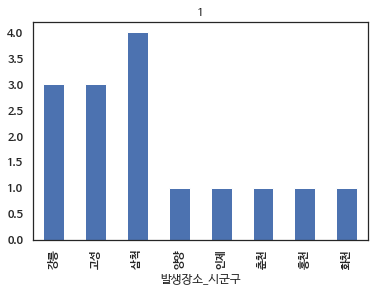

In [ ]:
# 발생 원인 - 장소
for i in [0,1]:
  data3[data3['대형산불']==i].groupby('발생장소_시군구').size().plot(kind='bar')
  plt.title(i)
  plt.show()

## Clustering

### k-means (data7

In [ ]:
print(scaledata1.columns)
print(scaledata2.columns)

Index(['index', '발생장소_시군구', '발생원인_구분', '대형산불', 'season', 'month', 'hour', '기온',
       '강수량log', '풍속log', '풍향', '습도log', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도sqrt', '진화시간_분log', '피해면적_합계'],
      dtype='object')
MultiIndex([(   '기온',),
            (  '강수량',),
            (   '풍속',),
            (   '풍향',),
            (   '습도',),
            ('이슬점온도',),
            ( '현지기압',),
            ( '해면기압',),
            (   '일조',),
            ( '지면온도',),
            (  'pc1',),
            (  'pc2',),
            (  'pc3',),
            (  'pc4',)],
           )


In [ ]:
# year - 10년 기후변화 패턴 찾기는 짧은 - 제거
data7 = pd.concat( [ scaledata2[['pc1','pc2','pc3','pc4']],
                    scaledata1[[ 'season', 'hour','month',
                                '진화시간_분log', '피해면적_합계', '발생장소_시군구', '발생원인_구분']] ],
                  axis=1)
data7.head(3)

data7.columns=['pc1','pc2','pc3','pc4','season', 'hour','month',
                                '진화시간_분', '피해면적_합계', '발생장소_시군구', '발생원인_구분']

In [ ]:
from sklearn.preprocessing import StandardScaler

kdata = data7[['pc1','pc2']] # 2가지 feature 대상

scaler = StandardScaler()
data_scale = scaler.fit_transform(kdata)

In [ ]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지
kdata['cluster']=model.fit_predict(data_scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# The lowest SSE value
model.inertia_
model.cluster_centers_

array([[ 0.93627786,  0.55460305],
       [-1.06567086, -0.44058361],
       [ 0.60729927, -0.93711672],
       [-0.76957899,  1.36520074]])

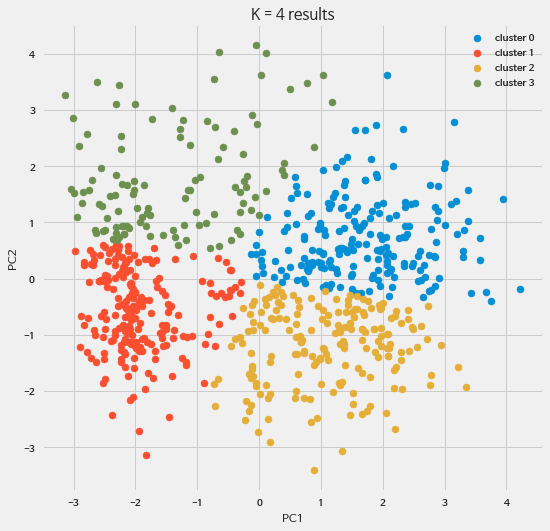

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(kdata.loc[kdata['cluster'] == i, 'pc1'],
                kdata.loc[kdata['cluster'] == i, 'pc2'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('PC1', size = 12)
plt.ylabel('PC2', size = 12)
plt.show()

#### 실루엣

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_scale)
    sse.append(kmeans.inertia_)

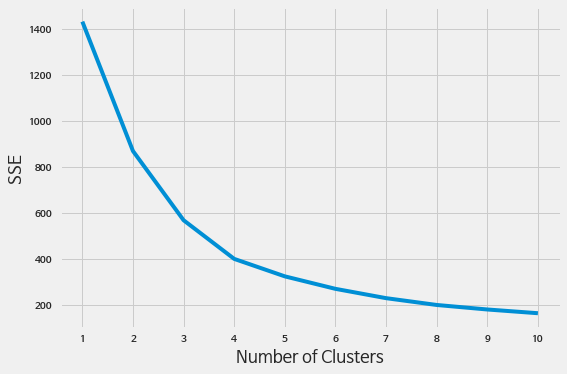

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import DataGenerator, KneeLocator
kl = KneeLocator(
range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

#### cluster

In [ ]:
kkk=pd.concat([kdata,scaledata1],axis=1)

{'boxes': [<matplotlib.lines.Line2D at 0x7f362ba58a90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f362ba5db10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f362ba66b50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f362ba66610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f362db83050>,
  <matplotlib.lines.Line2D at 0x7f362ba5d5d0>]}

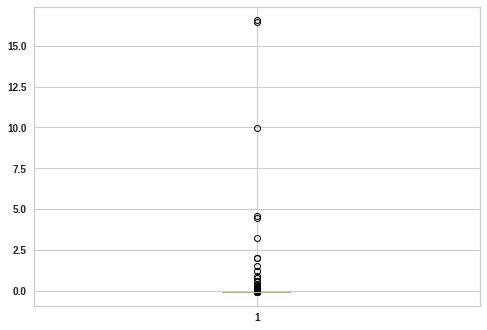

In [ ]:
plt.boxplot(kkk['피해면적_합계'])

In [ ]:
print(kkk[kkk['cluster']==0].groupby('발생장소_시군구').size())
print(kkk[kkk['cluster']==0].groupby('season').size())

발생장소_시군구
강릉    21
고성     2
동해     2
속초     4
영월    11
원주    24
인제    22
정선    15
철원    14
춘천    59
태백     2
홍천    32
dtype: int64
season
가을     22
겨울     12
봄     120
여름     54
dtype: int64


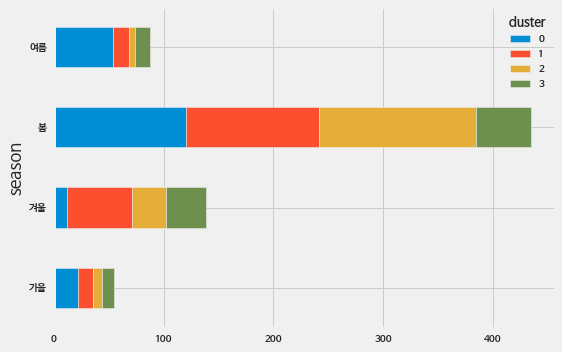

In [ ]:
#kkk[kkk['cluster']==3].groupby('season').size().hist()

#kkk[kkk['cluster']==3].groupby('season').size().plot(kind='bar')
#plt.show()

plt.rc('font', family='NanumBarunGothic')
aa=kkk.groupby(['season','cluster'])

aa.size().sort_values().unstack().plot(kind='barh',stacked=True)

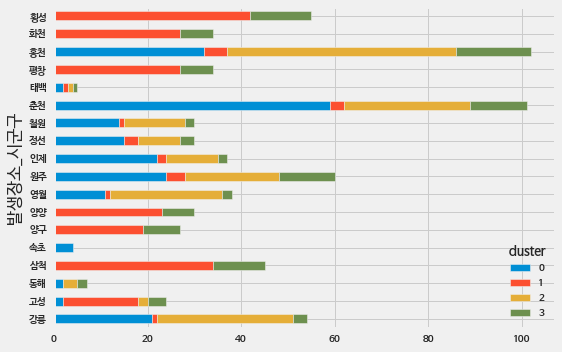

In [ ]:
plt.rc('font', family='NanumBarunGothic')
aa=kkk.groupby(['발생장소_시군구','cluster'])
aa.size().unstack().plot(kind='barh',stacked=True)

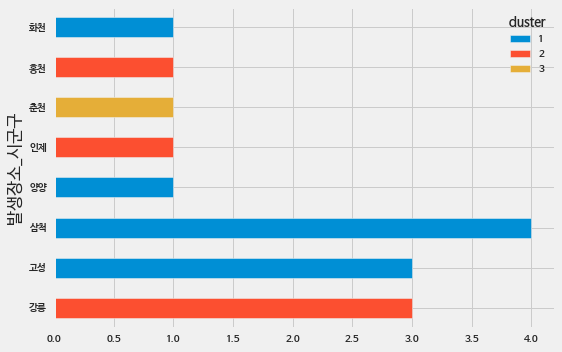

In [ ]:
plt.rc('font', family='NanumBarunGothic')
aa=kkk[kkk['대형산불']==1].groupby(['발생장소_시군구','cluster'])
aa.size().unstack().plot(kind='barh',stacked=True)

In [ ]:
print(kkk[kkk['cluster']==1].groupby('발생장소_시군구').size())
print(kkk[kkk['cluster']==1].groupby('season').size())

발생장소_시군구
강릉     1
고성    16
삼척    34
양구    19
양양    23
영월     1
원주     4
인제     2
정선     3
철원     1
춘천     3
태백     1
평창    27
홍천     5
화천    27
횡성    42
dtype: int64
season
가을     14
겨울     59
봄     122
여름     14
dtype: int64


In [ ]:
print(kkk[kkk['cluster']==2].groupby('발생장소_시군구').size())
print(kkk[kkk['cluster']==2].groupby('season').size())

발생장소_시군구
강릉    29
고성     2
동해     3
영월    24
원주    20
인제    11
정선     9
철원    13
춘천    27
태백     1
홍천    49
dtype: int64
season
가을      8
겨울     31
봄     143
여름      6
dtype: int64


In [ ]:
print(kkk[kkk['cluster']==3].groupby('발생장소_시군구').size())
print(kkk[kkk['cluster']==3].groupby('season').size())

발생장소_시군구
강릉     3
고성     4
동해     2
삼척    11
양구     8
양양     7
영월     2
원주    12
인제     2
정선     3
철원     2
춘천    12
태백     1
평창     7
홍천    16
화천     7
횡성    13
dtype: int64
season
가을    11
겨울    37
봄     50
여름    14
dtype: int64


In [ ]:
kkk[(kkk['대형산불']==1)&(kkk['cluster']==0)]

,pc1,pc2,cluster,index,발생장소_시군구,발생원인_구분,대형산불,season,month,hour,...,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt,진화시간_분log,피해면적_합계


In [ ]:
kkk[(kkk['대형산불']==1)&(kkk['cluster']==1)]

,pc1,pc2,cluster,index,발생장소_시군구,발생원인_구분,대형산불,season,month,hour,...,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt,진화시간_분log,피해면적_합계
155,-2.531438,-1.857509,1,155,삼척,기,1,겨울,-1.004758,-0.209257,...,0.668251,0.928365,-1.200623,-0.898774,1.466864,-0.107847,-1.134651,-1.31601,4.200838,0.582998
179,-1.937843,-2.715991,1,179,화천,쓰,1,봄,-0.639993,0.070142,...,0.872456,0.787721,-2.549123,-0.898774,1.466864,-0.107847,-1.134651,-1.31601,2.738378,0.784317
435,-2.006983,0.048253,1,435,삼척,입,1,봄,0.089538,-0.768054,...,0.323234,-0.819790,0.216581,-0.898774,0.513674,-0.792988,-1.134651,-1.31601,4.255340,9.966317
478,-2.641311,-1.480539,1,478,삼척,건,1,겨울,-1.004758,0.628939,...,0.060572,0.624157,-1.319677,-0.898774,1.685989,-0.013345,-1.134651,-1.31601,3.884881,2.019075
479,-2.778507,-1.310584,1,479,삼척,기,1,겨울,-1.004758,2.025933,...,1.233321,0.920030,0.176178,-0.898774,1.685989,-0.013345,-1.134651,-1.31601,3.758731,0.904845
488,-2.225277,-1.489876,1,488,고성,기,1,봄,-0.639993,-2.165048,...,2.286113,0.573108,0.488738,-0.898774,1.685989,-0.013345,-1.134651,-1.31601,2.414995,4.594251
518,-2.491220,-1.794047,1,518,양양,담,1,겨울,-1.369524,0.628939,...,1.274687,0.461635,-0.940723,-0.898774,1.521645,-0.139348,-1.134651,-1.31601,2.986200,1.187482
551,-2.089371,-2.154053,1,551,고성,기,1,봄,-0.275227,1.467136,...,2.439222,0.387666,-0.613320,-0.898774,1.521645,-0.139348,-1.134651,-1.31601,2.863732,16.565116
645,-1.744781,-0.620452,1,645,고성,건,1,봄,0.089538,1.746534,...,1.104551,0.351203,0.692662,-0.898774,0.678017,-0.737862,-1.134651,-1.31601,2.172162,1.519856


In [ ]:
kkk[(kkk['대형산불']==1)&(kkk['cluster']==2)]

,pc1,pc2,cluster,index,발생장소_시군구,발생원인_구분,대형산불,season,month,hour,...,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt,진화시간_분log,피해면적_합계
184,0.172558,-2.911511,2,184,홍천,입,1,봄,-0.639993,-0.209257,...,1.581248,0.695000,-2.123014,-1.312709,0.272637,0.766298,0.982301,0.456355,3.151882,0.386942
378,0.861693,-1.370593,2,378,강릉,입,1,봄,-0.639993,-1.047453,...,1.433081,0.903362,-0.173134,-0.494247,-1.020196,0.931677,0.982301,0.615380,3.422667,2.009470
438,2.198322,-2.670476,2,438,강릉,입,1,봄,0.089538,0.349541,...,2.093538,1.215904,-1.786996,-0.099128,-1.370795,0.695422,0.982301,1.208855,4.100336,3.214622
549,1.963860,-0.887267,2,549,인제,쓰,1,봄,-0.275227,0.070142,...,1.686417,-0.450990,-0.243717,0.295992,-0.680554,-0.422855,0.982301,0.685849,3.849539,4.437406
552,0.727595,-2.132333,2,552,강릉,기,1,봄,-0.275227,2.584731,...,2.439222,0.278276,-1.247403,-0.447209,-1.502270,0.593044,-1.134651,0.303120,2.810129,16.479983


In [ ]:
kkk[(kkk['대형산불']==1)&(kkk['cluster']==3)]

,pc1,pc2,cluster,index,발생장소_시군구,발생원인_구분,대형산불,season,month,hour,...,풍속log,풍향,습도log,이슬점온도,현지기압,해면기압,일조,지면온도sqrt,진화시간_분log,피해면적_합계
598,-0.308085,0.799742,3,598,춘천,담,1,겨울,-1.369524,-0.209257,...,-1.330989,0.695,0.798088,-0.080312,0.43698,1.48294,0.982301,-0.076659,3.084899,0.349573


### dbscans - pc1 pc2

minPts : 반경 내 최소 개체(point) 수  
eps(epsilon) : 군집화할 반경  
Core : 중심점(minPts를 만족할 경우)  
Border : 경계점(minPts를 만족하진 않지만, 어느 Core 반경에 속한 경우)  
Noise : 어느 군집에도 속하지 않는 점  

In [ ]:
from sklearn.cluster import DBSCAN
feature=data7[['pc1', 'pc3']]

# create model and prediction
model = DBSCAN(eps=0.63,min_samples=20) #0.7 10
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

          pc1       pc3  predict
0   -0.309391 -3.140955        0
1   -1.175337  0.529745       -1
2   -0.170344 -1.419721        0
3   -1.996645  0.562351        1
4   -1.811076  1.176748        1
..        ...       ...      ...
712  3.937531  0.342100       -1
713 -2.656986 -0.161887        1
714 -2.578600 -0.231577        1
715  0.699196 -2.094769        0
716 -1.415257 -2.372780        0

[717 rows x 3 columns]


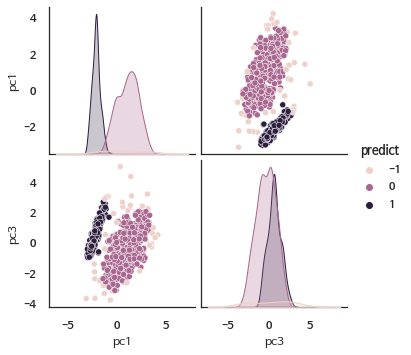

In [ ]:
#pairplot with Seaborn
sns.pairplot(r,hue='predict')
plt.show()

In [ ]:
rr=pd.concat([r,data7],axis=1)
rrr=pd.concat([rr[['pc1','pc3','predict']], data3], axis=1)

In [ ]:
sum(rrr['대형산불'])

15

In [ ]:
print(sum(rrr[rrr['predict']==1]['대형산불']))
print(sum(rrr[rrr['predict']==0]['대형산불']))
print(sum(rrr[rrr['predict']==-1]['대형산불']))

9
6
0


In [ ]:
# cluster 0 - 흐리고 햇빛을 덜 받는, 바람이 부는 날씨
r0 = rrr[(rrr['predict']==0)]
r0.iloc[:,6:]

,month,day,hour,발생장소_시군구,발생원인_구분,피해면적_합계,진화시간_분,기온,강수량,풍속,...,해면기압,일조,지면온도,대형산불,season,강수량log,풍속log,습도log,지면온도sqrt,진화시간_분log
0,1,11,15,홍천,입,0.03,95.0,-0.9,2.0,1.3,...,1011.5,1.0,3.2,0,겨울,1.098612,0.832909,3.135494,3.974921,4.564348
1,2,5,16,고성,입,0.20,21.0,8.4,0.0,2.5,...,982.4,0.0,8.9,0,겨울,0.000000,1.252763,2.772589,4.636809,3.091042
2,2,16,14,원주,건,0.10,70.0,2.6,0.0,3.3,...,1002.6,1.0,11.1,0,겨울,0.000000,1.458615,2.708050,4.868265,4.262680
5,4,9,16,춘천,입,0.02,111.0,24.2,2.3,2.1,...,1007.8,1.0,29.3,0,봄,1.193922,1.131402,2.564949,6.473021,4.718499
8,4,17,15,영월,건,0.10,55.0,20.3,0.0,1.7,...,984.8,0.9,39.1,0,봄,0.000000,0.993252,3.218876,7.190271,4.025352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6,7,15,강릉,쓰,0.01,107.0,29.2,0.0,3.0,...,1008.4,0.1,28.1,0,여름,0.000000,1.386294,3.713572,6.379655,4.682131
710,6,8,14,홍천,기,0.04,128.0,28.5,0.0,1.5,...,999.8,0.8,40.2,0,여름,0.000000,0.916291,3.637586,7.266361,4.859812
712,8,10,14,춘천,기,0.01,99.0,31.0,6.0,3.1,...,998.2,0.8,46.7,0,여름,1.945910,1.410987,4.077537,7.700649,4.605170
715,12,19,15,강릉,기,0.01,49.0,6.7,1.1,2.8,...,1015.4,1.0,10.3,0,겨울,0.741937,1.335001,3.135494,4.785394,3.912023


In [ ]:
r0[ r0['대형산불']==1 ]

,pc1,pc1,pc2,predict,index,year,month,day,hour,발생장소_시군구,...,해면기압,일조,지면온도,대형산불,season,강수량log,풍속log,습도log,지면온도sqrt,진화시간_분log
184,0.172558,0.172558,-2.911511,0,184,2015,3,23,13,홍천,...,1005.6,1.0,14.6,1,봄,0.000000,1.856298,2.397895,5.215362,7.455877
378,0.861693,0.861693,-1.370593,0,378,2017,3,9,10,강릉,...,1007.7,1.0,19.7,1,봄,0.000000,1.791759,3.367296,5.683309,7.679251
438,2.198322,2.198322,-2.670476,0,438,2017,5,6,15,강릉,...,1004.7,1.0,42.6,1,봄,0.000000,2.079442,2.564949,7.429670,8.238273
549,1.963860,1.963860,-0.887267,0,549,2019,4,4,14,인제,...,990.5,1.0,22.1,1,봄,1.504077,1.902108,3.332205,5.890671,8.031385
552,0.727595,0.727595,-2.132333,0,552,2019,4,4,23,강릉,...,1003.4,0.0,10.1,1,봄,0.693147,2.230014,2.833213,4.764452,7.173958
598,-0.308085,-0.308085,0.799742,0,598,2020,1,4,13,춘천,...,1014.7,1.0,0.7,1,겨울,0.000000,0.587787,3.850148,3.646917,7.400621


In [ ]:
r0.groupby('발생원인_구분').size()

발생원인_구분
건     20
기    166
담     26
쓰     46
입    206
dtype: int64

In [ ]:
r0.groupby('발생장소_시군구').size()
# 고성 삼척 양구 양양 화천 *평창 횡성

발생장소_시군구
강릉     54
고성      9
동해      7
속초      4
영월     37
원주     60
인제     36
정선     27
철원     30
춘천     98
홍천    102
dtype: int64

In [ ]:
r0[r0['대형산불']==1].groupby('발생장소_시군구').size()

발생장소_시군구
강릉    3
인제    1
춘천    1
홍천    1
dtype: int64

In [ ]:
rrr[(rrr['predict']==0) & (rrr['대형산불']==1)].iloc[:,4:19]

,predict,level_0,index,year,month,day,hour,발생장소_시군구,발생원인_구분,피해면적_합계,진화시간_분,기온,강수량,풍속,풍향
184,0,184,184,2015,3,23,13,홍천,입,37.10,1729.0,9.4,0.0,5.4,270.0
378,0,378,378,2017,3,9,10,강릉,입,160.41,2162.0,5.0,0.0,5.0,290.0
438,0,438,438,2017,5,6,15,강릉,입,252.00,3782.0,23.1,0.0,7.0,320.0
549,0,549,549,2019,4,4,14,인제,쓰,344.93,3075.0,15.3,3.5,5.7,160.0
552,0,552,552,2019,4,4,23,강릉,기,1260.15,1304.0,13.9,1.0,8.3,230.0
598,0,598,598,2020,1,4,13,춘천,담,34.26,1636.0,2.9,0.0,0.8,270.0


In [ ]:
rrr[(rrr['predict']==1) & (rrr['대형산불']==1)].iloc[:,4:19]

,predict,level_0,index,year,month,day,hour,발생장소_시군구,발생원인_구분,피해면적_합계,진화시간_분,기온,강수량,풍속,풍향
155,1,155,155,2015,2,8,13,삼척,기,52.00,4109.0,-1.8,0.0,3.3,292.4
179,1,179,179,2015,3,22,14,화천,쓰,67.30,1229.0,15.4,0.0,3.7,278.9
435,1,435,435,2017,5,6,11,삼척,입,765.12,4298.0,18.3,0.0,2.7,124.6
478,1,478,478,2018,2,11,16,삼척,건,161.14,3166.0,-0.3,0.0,2.3,263.2
479,1,479,479,2018,2,11,21,삼척,기,76.46,2853.0,-3.6,0.0,4.5,291.6
488,1,488,488,2018,3,28,6,고성,기,356.85,941.0,17.6,0.0,7.7,258.3
518,1,518,518,2019,1,1,16,양양,담,97.94,1508.0,1.7,0.0,4.6,247.6
551,1,551,551,2019,4,4,19,고성,기,1266.62,1363.0,15.7,0.0,8.3,240.5
645,1,645,645,2020,5,1,20,고성,건,123.20,770.0,27.1,0.0,4.2,237.0


In [ ]:
rrr=rrr[['predict', 'year', 'month', 'day', 'hour',
       '진화시간_분', '발생장소_시군구', '발생원인_구분', '피해면적_합계', '기온', '강수량',
       '풍속', '풍향', '습도', '이슬점온도', '현지기압', '해면기압', '일조', '지면온도', '대형산불',
       'season', '강수량log', '풍속log', '습도log', '지면온도sqrt', '진화시간_분log']]

In [ ]:
rrr.index

RangeIndex(start=0, stop=717, step=1)

In [ ]:
rrr

,predict,year,month,day,hour,진화시간_분,발생장소_시군구,발생원인_구분,피해면적_합계,기온,...,해면기압,일조,지면온도,대형산불,season,강수량log,풍속log,습도log,지면온도sqrt,진화시간_분log
0,0,2012,1,11,15,95.0,홍천,입,0.03,-0.9,...,1011.5,1.0,3.2,0,겨울,1.098612,0.832909,3.135494,3.974921,4.564348
1,0,2012,2,5,16,21.0,고성,입,0.20,8.4,...,982.4,0.0,8.9,0,겨울,0.000000,1.252763,2.772589,4.636809,3.091042
2,0,2012,2,16,14,70.0,원주,건,0.10,2.6,...,1002.6,1.0,11.1,0,겨울,0.000000,1.458615,2.708050,4.868265,4.262680
3,1,2012,3,12,15,85.0,횡성,건,0.10,4.6,...,982.4,0.0,-12.6,0,봄,0.000000,1.280934,3.081910,0.000000,4.454347
4,1,2012,3,30,17,94.0,양구,건,0.10,13.2,...,982.4,0.0,-12.6,0,봄,0.000000,1.568616,3.440418,0.000000,4.553877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,0,2021,8,10,14,99.0,춘천,기,0.01,31.0,...,998.2,0.8,46.7,0,여름,1.945910,1.410987,4.077537,7.700649,4.605170
713,1,2021,11,14,21,305.0,양양,쓰,1.27,10.8,...,992.4,0.0,-12.6,0,가을,0.000000,0.693147,4.133565,0.000000,5.723585
714,1,2021,11,29,13,115.0,횡성,기,0.45,10.5,...,992.4,0.0,-12.6,0,가을,0.000000,0.641854,3.742420,0.000000,4.753590
715,0,2021,12,19,15,49.0,강릉,기,0.01,6.7,...,1015.4,1.0,10.3,0,겨울,0.741937,1.335001,3.135494,4.785394,3.912023


In [ ]:
data7.columns

Index(['pc1', 'pc2', 'pc3', 'pc4', 'season', 'hour', 'month', '진화시간_분',
       '피해면적_합계', '발생장소_시군구', '발생원인_구분'],
      dtype='object')

In [ ]:
scaledata1.columns

Index(['index', '발생장소_시군구', '발생원인_구분', '대형산불', 'season', 'month', 'hour', '기온',
       '강수량log', '풍속log', '풍향', '습도log', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도sqrt', '진화시간_분log', '피해면적_합계'],
      dtype='object')

In [ ]:
data5.columns

Index(['index', 'year', 'month', 'day', 'hour', '발생장소_시군구', '발생원인_구분',
       '피해면적_합계', '진화시간_분', '기온', '강수량', '풍속', '풍향', '습도', '이슬점온도', '현지기압',
       '해면기압', '일조', '지면온도', '대형산불', 'season', '강수량log', '풍속log', '습도log',
       '지면온도sqrt', '진화시간_분log'],
      dtype='object')

In [ ]:
aaa=pd.concat([data7,data5['year']],axis=1)
aaa=pd.concat([aaa,scaledata1[['기온','풍향','이슬점온도',
       '현지기압', '해면기압', '일조', '강수량log', '풍속log', '습도log', '지면온도sqrt']]],axis=1)

aaa=pd.concat([aaa,rrr['predict']],axis=1)

# logistic

In [ ]:
kkk.columns

Index(['pc1', 'pc2', 'cluster', 'index', '발생장소_시군구', '발생원인_구분', '대형산불',
       'season', 'month', 'hour', '기온', '강수량log', '풍속log', '풍향', '습도log',
       '이슬점온도', '현지기압', '해면기압', '일조', '지면온도sqrt', '진화시간_분log', '피해면적_합계'],
      dtype='object')

In [ ]:
scaledata2.columns

MultiIndex([(   '기온',),
            (  '강수량',),
            (   '풍속',),
            (   '풍향',),
            (   '습도',),
            ('이슬점온도',),
            ( '현지기압',),
            ( '해면기압',),
            (   '일조',),
            ( '지면온도',),
            (  'pc1',),
            (  'pc2',),
            (  'pc3',),
            (  'pc4',)],
           )

In [ ]:
scaledata2.columns=[['기온','강수량','풍속','풍향','습도','이슬점온도','현지기압','해면기압','일조','지면온도',
                     'pc1','pc2','pc3','pc4']]

In [ ]:
scaledata1.columns

Index(['index', '발생장소_시군구', '발생원인_구분', '대형산불', 'season', 'month', 'hour', '기온',
       '강수량log', '풍속log', '풍향', '습도log', '이슬점온도', '현지기압', '해면기압', '일조',
       '지면온도sqrt', '진화시간_분log', '피해면적_합계'],
      dtype='object')

In [ ]:
data9=pd.DataFrame()
data9=pd.concat([data9,kkk],axis=1)
data9=pd.concat([data9,scaledata2[['pc3','pc4']]],axis=1)
data9=pd.get_dummies(data9)

In [ ]:
data9.columns=[        'pc1',         'pc2',     'cluster',       'index',
              '대형산불',       'month',        'hour',          '기온',
            '강수량log',       '풍속log',          '풍향',       '습도log',
             '이슬점온도',        '현지기압',        '해면기압',          '일조',
          '지면온도sqrt',   '진화시간_분log',     '피해면적_합계',      'pc3',
            'pc4', '발생장소_시군구_강릉', '발생장소_시군구_고성', '발생장소_시군구_동해',
       '발생장소_시군구_삼척', '발생장소_시군구_속초', '발생장소_시군구_양구', '발생장소_시군구_양양',
       '발생장소_시군구_영월', '발생장소_시군구_원주', '발생장소_시군구_인제', '발생장소_시군구_정선',
       '발생장소_시군구_철원', '발생장소_시군구_춘천', '발생장소_시군구_태백', '발생장소_시군구_평창',
       '발생장소_시군구_홍천', '발생장소_시군구_화천', '발생장소_시군구_횡성',   '발생원인_구분_건',
         '발생원인_구분_기',   '발생원인_구분_담',   '발생원인_구분_쓰',   '발생원인_구분_입',
         'season_가을',   'season_겨울',    'season_봄',   'season_여름']

In [ ]:
print(data9.대형산불.value_counts())

0    702
1     15
Name: 대형산불, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score

x = data9[['pc1', 'pc2', 'pc3', 'pc4','cluster','month','hour',
       '발생장소_시군구_강릉','발생장소_시군구_고성',
       '발생장소_시군구_동해', '발생장소_시군구_삼척', '발생장소_시군구_속초', '발생장소_시군구_양구',
       '발생장소_시군구_양양', '발생장소_시군구_영월', '발생장소_시군구_원주', '발생장소_시군구_인제',
       '발생장소_시군구_정선', '발생장소_시군구_철원', '발생장소_시군구_춘천', '발생장소_시군구_태백',
       '발생장소_시군구_평창', '발생장소_시군구_홍천', '발생장소_시군구_화천', '발생장소_시군구_횡성']]
y = data9[['대형산불']]


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3,random_state=42)

from sklearn.linear_model import LogisticRegression

def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)

#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))


lr = LogisticRegression()
modeling(lr,x_train,x_test,y_train,y_test)


정확도 : 0.99, 정밀도 : 0.00, 재현율 : 0.00
f1-score : 0.00, auc : 0.50


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_over,y_train_over = smote.fit_resample(x_train,y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_over.shape, y_train_over.shape)
#print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (501, 25) (501, 1)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (978, 25) (978, 1)


In [ ]:
print(y_train.value_counts())
print(y_train_over.value_counts())

대형산불
0       489
1        12
dtype: int64
대형산불
0       489
1       489
dtype: int64


In [ ]:
lr = LogisticRegression()
modeling(lr,x_train_over,x_test,y_train_over,y_test)

#정확도 : 0.80, 정밀도 : 0.11, 재현율 : 0.83
#f1-score : 0.19, auc : 0.82

#정확도 : 0.92, 정밀도 : 0.17, 재현율 : 0.50
#f1-score : 0.25, auc : 0.71 -> 발생원인 추가

정확도 : 0.95, 정밀도 : 0.17, 재현율 : 0.67
f1-score : 0.27, auc : 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       213
           1       0.17      0.67      0.27         3

    accuracy                           0.95       216
   macro avg       0.58      0.81      0.62       216
weighted avg       0.98      0.95      0.96       216



In [ ]:
lr.coef_

array([[-0.60070498, -1.1901564 ,  0.17828686, -0.54662213,  0.24745686,
        -0.64581756,  0.10590348, -0.37800518, -1.57713468, -0.41108844,
        -2.1289909 , -0.04026626, -3.09074162, -3.61098244, -2.92756808,
        -2.93802323, -1.92039896, -1.98564213, -1.62463718, -2.69750878,
        -0.88788346, -3.45909181, -3.29687325, -3.69573022, -3.78618094]])

In [ ]:
'pc1', 'pc2', 'pc3', 'pc4','cluster',
'month','hour','발생장소_시군구_강릉','발생장소_시군구_고성','발생장소_시군구_동해',
'발생장소_시군구_삼척', '발생장소_시군구_속초', '발생장소_시군구_양구','발생장소_시군구_양양', '발생장소_시군구_영월', '발생장소_시군구_원주', '발생장소_시군구_인제',
       '발생장소_시군구_정선', '발생장소_시군구_철원', '발생장소_시군구_춘천', '발생장소_시군구_태백',
       '발생장소_시군구_평창', '발생장소_시군구_홍천', '발생장소_시군구_화천', '발생장소_시군구_횡성'

# Randomforestregressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=12,
                            min_samples_leaf=6,
                            min_samples_split=6,
                            n_estimators=8,
                            random_state=42)
rf.fit(x_train_over,y_train_over)

print(rf.score(x_train_over, y_train_over))
#print(rf.score(x_test, y_test))

predicted=rf.predict(x_test)
accuracy=accuracy_score(y_test,predicted)

print(f'Mean accuracy score: {accuracy:.3}')

modeling(rf,x_train_over,x_test,y_train_over,y_test)

0.967280163599182
Mean accuracy score: 0.954
정확도 : 0.95, 정밀도 : 0.18, 재현율 : 0.67
f1-score : 0.29, auc : 0.81


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       213
           1       0.18      0.67      0.29         3

    accuracy                           0.95       216
   macro avg       0.59      0.81      0.63       216
weighted avg       0.98      0.95      0.97       216



In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [8,10,12,14],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [6,8,10],
           'min_samples_split' : [6,8,10]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train_over, y_train_over)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 12}
최고 예측 정확도: 0.9601


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



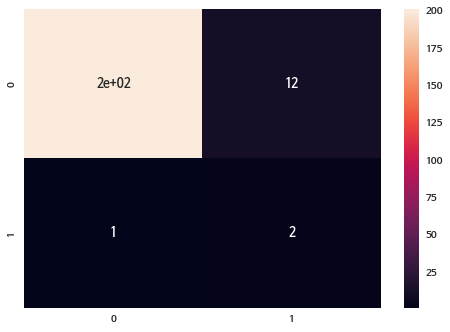

In [ ]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)

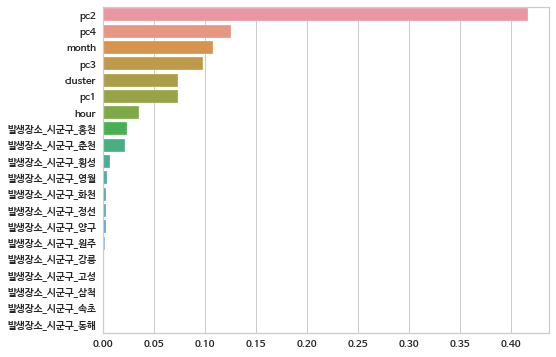

In [ ]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
#%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

# light gbm

In [ ]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=10, n_jobs=-1, boost_from_average=False)
modeling(lgbm_clf, x_train_over, x_test, y_train_over, y_test)

정확도 : 0.94, 정밀도 : 0.15, 재현율 : 0.67
f1-score : 0.25, auc : 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



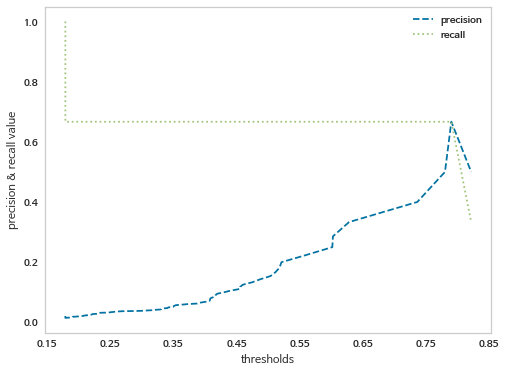

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')

    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))

    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

pred_proba = lgbm_clf.predict_proba(x_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba)

#precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

In [ ]:
from sklearn.ensemble import VotingClassifier

# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', lr), ('LGBM', lgbm_clf)], voting='soft')


# 보팅 분류기의 학습/예측/평가
voting_model.fit(x_train_over, y_train_over)
pred = voting_model.predict(x_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))
print('보팅 분류기의 정밀도: {0: .4f}'.format(precision_score(y_test,pred)))
print('보팅 분류기의 재현율: {0: .4f}'.format(recall_score(y_test, pred)))
print('보팅 분류기의 f1score: {0: .4f}'.format(f1_score(y_test, pred)))
print()

# 개별 모델의 학습/예측/평가
classifiers = [lr, lgbm_clf]
for classifier in classifiers:
    classifier.fit(x_train_over, y_train_over)
    pred = classifier.predict(x_test)
    class_name = classifier.__class__.__name__

    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py

보팅 분류기의 정확도:  0.9676
보팅 분류기의 정밀도:  0.2500
보팅 분류기의 재현율:  0.6667
보팅 분류기의 f1score:  0.3636

정확도 : 0.95, 정밀도 : 0.17, 재현율 : 0.67
f1-score : 0.27, auc : 0.81
정확도 : 0.94, 정밀도 : 0.15, 재현율 : 0.67
f1-score : 0.25, auc : 0.81


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier(n_neighbors = 2)
kn.fit(x_train_over, y_train_over)
print('최근접 이웃 모델 훈련', kn.score(x_train_over,y_train_over))
print('최근접 이웃 모델 test', kn.score(x_test,y_test))


modeling(kn,x_train_over,x_test,y_train_over,y_test)

최근접 이웃 모델 훈련 0.9989775051124744
최근접 이웃 모델 test 0.9537037037037037
정확도 : 0.95, 정밀도 : 0.18, 재현율 : 0.67
f1-score : 0.29, auc : 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

